In [34]:
######## 폐암 수술 환자의 생존율 예측 ##########
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import tensorflow as tf

#실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#수술 환자 데이터 로드
Data_set = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=',')
#마지막 열이 생존 여부, label로 분리해줌
X = Data_set[:,:-1]
Y = Data_set[:, -1]

print(len(X[0][:]))
#17

model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
#활성화 함수는 relu로, features가 17개이므로 입력은 17
model.add(Dense(1, activation='sigmoid'))
#출력 부분, 출력 뉴런은 하나면 되고 결과는 0 혹은 1이므로 Sigmoid

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#평균 제곱 오차는 수렴까지 속도가 많이 걸린다는 단점이 있음
#손실 함수 loss는 오차 계산에 쓰임, 경사 하강 기법은 adam 모멘텀과 알엠에스프롭 합친 걸 사용

#교차 엔트로피는 출력 값에 로그를 취해 오차가 커지면 수렴 속도가 빨라지고 오차가 작아지면 느려지게 만듦
#보통 생존 여부를 파악하거나 할 땐 accuracy 측정?

model.fit(X, Y, epochs=100, batch_size=10)
#epochs 는 전체 데이터 셋에 대한 학습(forward pass + backward pass) 수?
#메모리 한계와 속도 저하 때문에 한 번의 epoch에서 모든 데이터를 한 번에 집어넣을 수 없음
#따라서 데이터를 나누어 집어넣는데 이때 몇번 나누는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch_size

Using TensorFlow backend.


KeyboardInterrupt: 

In [97]:
########신경망 학습에서 발생하는 과적합 제거 및 감소##############
from sklearn.preprocessing import LabelEncoder

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

df = pd.read_csv('./dataset/sonar.csv',  header=None)
print(df.head())
print(df.info())

dataset = df.values
X = dataset[:,0:60].astype(float)
y = dataset[:,60]

#y는 R, M 등으로 이루어져있으므로 LabelEncoder()를 통해 숫자로 변환
le =LabelEncoder()
le.fit(y)
Y = le.transform(y)
Y

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
#첫번재 은닉층 (출력뉴런수 24, 활성화함수 relu)
#두번재 은닉층 (출력뉴런수 10, 활성화함수 relu)
#출력층 (출력뉴런수 1, 활성화함수 sigmoid)
#epochs =200
#batch_size=5
#오차함수 : 평균 제곱 오차계산함수
#최적화함수 : adam
#측정지표 : accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
 
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=5)
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/100
145/145 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.5310
Epoch 2/100
145/145 [==============================] - 0s 836us/step - loss: 0.2463 - accuracy: 0.5172
Epoch 3/100
145/145 [==============================] - 0s 805us/step - loss: 0.2440 - accuracy: 0.5379
Epoch 4/100
145/145 [==============================] - 0s 784us/step - loss: 0.2420 - accuracy: 0.5310
Epoch 5/100
145/145 [==============================] - 0s 908us/step - loss: 0.2398 - accuracy: 0.5448
Epoch 6/100
145/145 [==============================] - 0s 853us/step - loss: 0.2382 - accuracy: 0.5517
Epoch 7/100
145/145 [==============================] - 0s 743us/step - loss: 0.2340 - accuracy: 0.5448
Epoch 8/100
145/145 [==============================] - 0s 791us/step - loss: 0.2302 - accuracy: 0.5586
Epoch 9/100
145/145 [==============================] - 0s 784us/step - loss: 0.2209 - accuracy: 0.6483
Epoch 10/100
145/145 [==============================] - 0s 667us/step - los

145/145 [==============================] - 0s 674us/step - loss: 0.0737 - accuracy: 0.9034
Epoch 80/100
145/145 [==============================] - 0s 660us/step - loss: 0.0730 - accuracy: 0.9034
Epoch 81/100
145/145 [==============================] - 0s 647us/step - loss: 0.0722 - accuracy: 0.9310
Epoch 82/100
145/145 [==============================] - 0s 688us/step - loss: 0.0682 - accuracy: 0.9103
Epoch 83/100
145/145 [==============================] - 0s 667us/step - loss: 0.0702 - accuracy: 0.9172
Epoch 84/100
145/145 [==============================] - 0s 660us/step - loss: 0.0662 - accuracy: 0.9241
Epoch 85/100
145/145 [==============================] - 0s 674us/step - loss: 0.0652 - accuracy: 0.9310
Epoch 86/100
145/145 [==============================] - 0s 660us/step - loss: 0.0657 - accuracy: 0.9172
Epoch 87/100
145/145 [==============================] - 0s 660us/step - loss: 0.0638 - accuracy: 0.9310
Epoch 88/100
145/145 [==============================] - 0s 688us/step - loss:

In [99]:
#학습 결과 모델을 저장후 새로운 데이터에 대해서 예측할때 저장된 모델을 불러와 사용합니다.
from keras.models import load_model

model.save('sonar_model.h5')

 
from tensorflow.keras.models import load_model
model2 = load_model('sonar_model.h5')
 
print("\n Accuracy: %.4f" % (model2.evaluate(X_test, Y_test)[1]))

63/63 [==============================] - 0s 2ms/sample - loss: 0.1426 - acc: 0.8413

 Accuracy: 0.8413


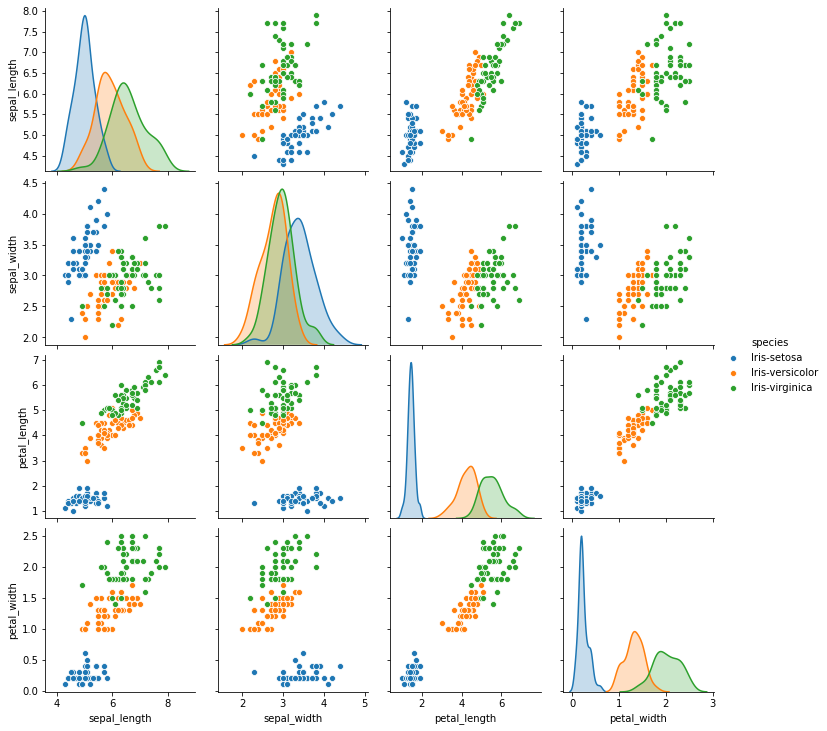

In [101]:
###############신경망을 이용한 다중 분류###########################
#여러 개의 정답 중 하나를 고르는 분류 문제
#상관도 그래프 시각화를 통해 꽃잎과 꽃받침의 크기와 너비가 품종별로 차이가 있는 지 확인
 
np.random.seed(0)
tf.set_random_seed(0)


df = pd.read_csv('./dataset/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# pairplot 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()

#클래스 Y값 문자열을 수치 데이터로 변환 
#( sklearn의 LabelEncoder -> One-hot-Encoding) 
#tensorflow.keras.utils.to_categorical()

data = df.values
X = data[:, 0:4].astype(float)
Y = data[:, 4]

#Label 인코딩
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
Y_num = le.fit_transform(Y)
Y_encoded = tf.keras.utils.to_categorical(Y_num)

In [102]:
#첫번째 은닉층 (출력뉴런수 16, 활성화함수 re)
#출력증 (출력뉴런수 3, 활성화함수 softmax)
#오차함수 : categorial_crossentroy
#최적화함수 : adam
#측정지표 : accuracy
#epochs : 50
#batch_size : 1

model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.fit(X, Y_encoded, epochs=50, batch_size=1)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 1.6259 - accuracy: 0.3267
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 1.1405 - accuracy: 0.4867
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.9412 - accuracy: 0.4600
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.7898 - accuracy: 0.7467
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.8800
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.8267
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8867
Epoch 10/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8867

In [77]:
#피마 인디언 당뇨병 데이터셋 로드
import pandas as pd

diab = pd.read_csv('dataset/pima-indians-diabetes.csv',
                  names = ["pregnant", "plasma", "pressure", "thickness",
                           "insulin", "BMI", "pedigree", "age", "class"])
diab.tail()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [78]:
#전반적인 정보 확인 (컬럼 데이터 타입 확인)
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


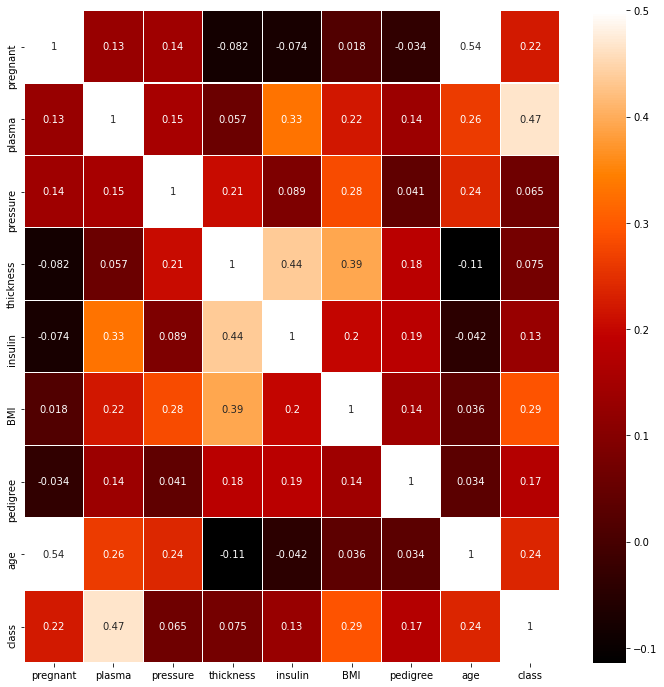

In [79]:
#히트맵 그려 8개의 속성 중 당뇨병에 상관성이 높은 특성 찾기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,12))
colormap = plt.cm.gist_heat

sns.heatmap(diab.corr(),
            linewidths=0.1,
            linecolor='white',
            vmax=0.5, cmap=colormap, annot=True)
#vmax=0.5 - 0.5에 가까울수록 밝게 표시
plt.show()

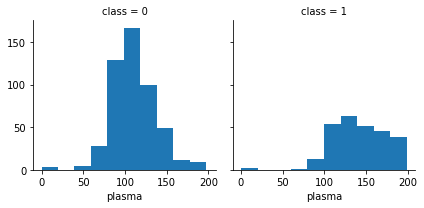

In [80]:
#클래스 0(정상)인 데이터와 1인 데이터 중 plasma 값 분포 비교

grid = sns.FacetGrid(diab, col="class")
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [109]:
###############신경망을 이용한 피마 인디언 당뇨병 데이터 이진 분류###########################
#텐서플로우 라이브러리의 신경망을 사용해 학습 후 정확도 출력
#첫번째 은닉층 출력뉴런수 12 , 활성화 함수 relu
#두번째 은닉층 출력뉴런수 8 , 활성화 함수 relu
#출력층 출력뉴런수 1 , 활성화 함수 sigmoid
#오차계산함수 binary_crossentroy
#최적화함수 adam
#측정 지표 accuracy
#각 데이터 샘플당 200, batch_size=10
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

#시드 0 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#데이터
df = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter=',')
X = df[:,:-1]
Y = df[:, -1]

#input 수
print(len(X[0][:]))

8


In [110]:
model = Sequential()

#첫번째 은닉층
model.add(Dense(12, input_dim=8, activation='relu'))

#두번째 은닉층
model.add(Dense(8, activation='relu'))

#출력층
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=10)

print('\nAccuracy: %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/200
768/768 [==============================] - 1s 777us/step - loss: 2.4394 - accuracy: 0.5130
Epoch 2/200
768/768 [==============================] - 0s 484us/step - loss: 0.9124 - accuracy: 0.6367
Epoch 3/200
768/768 [==============================] - 0s 389us/step - loss: 0.7963 - accuracy: 0.6393
Epoch 4/200
768/768 [==============================] - 0s 409us/step - loss: 0.7417 - accuracy: 0.6107
Epoch 5/200
768/768 [==============================] - 0s 414us/step - loss: 0.6799 - accuracy: 0.6419
Epoch 6/200
768/768 [==============================] - 0s 394us/step - loss: 0.6499 - accuracy: 0.6341
Epoch 7/200
768/768 [==============================] - 0s 397us/step - loss: 0.6380 - accuracy: 0.6497
Epoch 8/200
768/768 [==============================] - 0s 406us/step - loss: 0.6384 - accuracy: 0.6237
Epoch 9/200
768/768 [==============================] - 0s 432us/step - loss: 0.6310 - accuracy: 0.6341
Epoch 10/200
768/768 [==============================] - 0s 386us/step - l

768/768 [==============================] - 0s 392us/step - loss: 0.5154 - accuracy: 0.7513
Epoch 80/200
768/768 [==============================] - 0s 386us/step - loss: 0.5069 - accuracy: 0.7487
Epoch 81/200
768/768 [==============================] - 0s 390us/step - loss: 0.5191 - accuracy: 0.7435
Epoch 82/200
768/768 [==============================] - 0s 391us/step - loss: 0.5043 - accuracy: 0.7513
Epoch 83/200
768/768 [==============================] - 0s 386us/step - loss: 0.5222 - accuracy: 0.7383
Epoch 84/200
768/768 [==============================] - 0s 392us/step - loss: 0.5053 - accuracy: 0.7487
Epoch 85/200
768/768 [==============================] - 0s 384us/step - loss: 0.5066 - accuracy: 0.7474
Epoch 86/200
768/768 [==============================] - 0s 384us/step - loss: 0.5097 - accuracy: 0.7500
Epoch 87/200
768/768 [==============================] - 0s 384us/step - loss: 0.5128 - accuracy: 0.7448
Epoch 88/200
768/768 [==============================] - 0s 391us/step - loss:

768/768 [==============================] - 0s 388us/step - loss: 0.4805 - accuracy: 0.7708
Epoch 158/200
768/768 [==============================] - 0s 387us/step - loss: 0.4722 - accuracy: 0.7669
Epoch 159/200
768/768 [==============================] - 0s 393us/step - loss: 0.4733 - accuracy: 0.7656
Epoch 160/200
768/768 [==============================] - 0s 388us/step - loss: 0.4721 - accuracy: 0.7578
Epoch 161/200
768/768 [==============================] - 0s 392us/step - loss: 0.4736 - accuracy: 0.7643
Epoch 162/200
768/768 [==============================] - 0s 397us/step - loss: 0.4680 - accuracy: 0.7747
Epoch 163/200
768/768 [==============================] - 0s 384us/step - loss: 0.4651 - accuracy: 0.7656
Epoch 164/200
768/768 [==============================] - 0s 392us/step - loss: 0.4692 - accuracy: 0.7878
Epoch 165/200
768/768 [==============================] - 0s 392us/step - loss: 0.4825 - accuracy: 0.7591
Epoch 166/200
768/768 [==============================] - 0s 394us/ste

In [108]:
#######데이터셋 크기가 작은 경우 K겹 교차 검증으로 학습#######
#전체 데이터셋을 K개의 부분 데이터셋으로 나눠 학습시에 한번씩 테스트 셋으로 활용
#전체 데이터를 테스트 셋으로 활용
from sklearn.model_selection import StratifiedKFold

#폴드 수
n_fold=5

skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)

for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24,  input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=100, batch_size=5)
    k_accuracy = model.evaluate(X_test, Y_test)[1]
    print('\nAccuracy: %.4f' % (k_accuracy))

Epoch 1/100
145/145 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.4759
Epoch 2/100
145/145 [==============================] - 0s 894us/step - loss: 0.2474 - accuracy: 0.5034
Epoch 3/100
145/145 [==============================] - 0s 857us/step - loss: 0.2418 - accuracy: 0.5724
Epoch 4/100
145/145 [==============================] - 0s 894us/step - loss: 0.2369 - accuracy: 0.6759
Epoch 5/100
145/145 [==============================] - 0s 853us/step - loss: 0.2312 - accuracy: 0.6828
Epoch 6/100
145/145 [==============================] - 0s 819us/step - loss: 0.2225 - accuracy: 0.7172
Epoch 7/100
145/145 [==============================] - 0s 805us/step - loss: 0.2166 - accuracy: 0.7448
Epoch 8/100
145/145 [==============================] - 0s 763us/step - loss: 0.2061 - accuracy: 0.7793
Epoch 9/100
145/145 [==============================] - 0s 743us/step - loss: 0.2003 - accuracy: 0.7793
Epoch 10/100
145/145 [==============================] - 0s 736us/step - los

145/145 [==============================] - 0s 832us/step - loss: 0.0625 - accuracy: 0.9448
Epoch 80/100
145/145 [==============================] - 0s 763us/step - loss: 0.0599 - accuracy: 0.9310
Epoch 81/100
145/145 [==============================] - 0s 729us/step - loss: 0.0573 - accuracy: 0.9517
Epoch 82/100
145/145 [==============================] - 0s 763us/step - loss: 0.0562 - accuracy: 0.9586
Epoch 83/100
145/145 [==============================] - 0s 729us/step - loss: 0.0558 - accuracy: 0.9517
Epoch 84/100
145/145 [==============================] - 0s 846us/step - loss: 0.0516 - accuracy: 0.9586
Epoch 85/100
145/145 [==============================] - 0s 777us/step - loss: 0.0492 - accuracy: 0.9586
Epoch 86/100
145/145 [==============================] - 0s 729us/step - loss: 0.0475 - accuracy: 0.9655
Epoch 87/100
145/145 [==============================] - 0s 750us/step - loss: 0.0482 - accuracy: 0.9586
Epoch 88/100
145/145 [==============================] - 0s 757us/step - loss:

145/145 [==============================] - 0s 763us/step - loss: 0.0695 - accuracy: 0.9172
Epoch 58/100
145/145 [==============================] - 0s 743us/step - loss: 0.0707 - accuracy: 0.8966
Epoch 59/100
145/145 [==============================] - 0s 743us/step - loss: 0.0681 - accuracy: 0.9310
Epoch 60/100
145/145 [==============================] - 0s 715us/step - loss: 0.0688 - accuracy: 0.9103
Epoch 61/100
145/145 [==============================] - 0s 715us/step - loss: 0.0667 - accuracy: 0.9379
Epoch 62/100
145/145 [==============================] - 0s 777us/step - loss: 0.0650 - accuracy: 0.9241
Epoch 63/100
145/145 [==============================] - 0s 832us/step - loss: 0.0653 - accuracy: 0.9172
Epoch 64/100
145/145 [==============================] - 0s 860us/step - loss: 0.0642 - accuracy: 0.9448
Epoch 65/100
145/145 [==============================] - 0s 860us/step - loss: 0.0618 - accuracy: 0.9379
Epoch 66/100
145/145 [==============================] - 0s 812us/step - loss:

145/145 [==============================] - 0s 818us/step - loss: 0.0898 - accuracy: 0.8897
Epoch 36/100
145/145 [==============================] - 0s 846us/step - loss: 0.0882 - accuracy: 0.9172
Epoch 37/100
145/145 [==============================] - 0s 839us/step - loss: 0.0880 - accuracy: 0.8897
Epoch 38/100
145/145 [==============================] - 0s 839us/step - loss: 0.0880 - accuracy: 0.8966
Epoch 39/100
145/145 [==============================] - 0s 832us/step - loss: 0.0856 - accuracy: 0.9172
Epoch 40/100
145/145 [==============================] - 0s 846us/step - loss: 0.0797 - accuracy: 0.9172
Epoch 41/100
145/145 [==============================] - 0s 839us/step - loss: 0.0782 - accuracy: 0.9034
Epoch 42/100
145/145 [==============================] - 0s 825us/step - loss: 0.0825 - accuracy: 0.9103
Epoch 43/100
145/145 [==============================] - 0s 825us/step - loss: 0.0752 - accuracy: 0.9034
Epoch 44/100
145/145 [==============================] - 0s 846us/step - loss:

145/145 [==============================] - 0s 853us/step - loss: 0.1521 - accuracy: 0.8414
Epoch 14/100
145/145 [==============================] - 0s 839us/step - loss: 0.1486 - accuracy: 0.8483
Epoch 15/100
145/145 [==============================] - 0s 839us/step - loss: 0.1420 - accuracy: 0.8483
Epoch 16/100
145/145 [==============================] - 0s 825us/step - loss: 0.1388 - accuracy: 0.8621
Epoch 17/100
145/145 [==============================] - 0s 853us/step - loss: 0.1354 - accuracy: 0.8621
Epoch 18/100
145/145 [==============================] - 0s 839us/step - loss: 0.1319 - accuracy: 0.8483
Epoch 19/100
145/145 [==============================] - 0s 832us/step - loss: 0.1287 - accuracy: 0.8552
Epoch 20/100
145/145 [==============================] - 0s 853us/step - loss: 0.1268 - accuracy: 0.8414
Epoch 21/100
145/145 [==============================] - 0s 832us/step - loss: 0.1219 - accuracy: 0.8621
Epoch 22/100
145/145 [==============================] - 0s 839us/step - loss:

145/145 [==============================] - 0s 819us/step - loss: 0.0216 - accuracy: 0.9931
Epoch 92/100
145/145 [==============================] - 0s 818us/step - loss: 0.0189 - accuracy: 0.9862
Epoch 93/100
145/145 [==============================] - 0s 812us/step - loss: 0.0184 - accuracy: 1.0000
Epoch 94/100
145/145 [==============================] - 0s 874us/step - loss: 0.0194 - accuracy: 0.9931
Epoch 95/100
145/145 [==============================] - 0s 805us/step - loss: 0.0163 - accuracy: 0.9931
Epoch 96/100
145/145 [==============================] - 0s 818us/step - loss: 0.0164 - accuracy: 0.9862
Epoch 97/100
145/145 [==============================] - 0s 832us/step - loss: 0.0174 - accuracy: 0.9793
Epoch 98/100
145/145 [==============================] - 0s 757us/step - loss: 0.0181 - accuracy: 0.9793
Epoch 99/100
145/145 [==============================] - 0s 784us/step - loss: 0.0157 - accuracy: 1.0000
Epoch 100/100
63/63 [==============================] - 0s 2ms/step

Accuracy:

145/145 [==============================] - 0s 777us/step - loss: 0.0454 - accuracy: 0.9586
Epoch 70/100
145/145 [==============================] - 0s 784us/step - loss: 0.0428 - accuracy: 0.9793
Epoch 71/100
145/145 [==============================] - 0s 722us/step - loss: 0.0486 - accuracy: 0.9379
Epoch 72/100
145/145 [==============================] - 0s 812us/step - loss: 0.0416 - accuracy: 0.9655
Epoch 73/100
145/145 [==============================] - 0s 770us/step - loss: 0.0419 - accuracy: 0.9862
Epoch 74/100
145/145 [==============================] - 0s 764us/step - loss: 0.0386 - accuracy: 0.9724
Epoch 75/100
145/145 [==============================] - 0s 777us/step - loss: 0.0406 - accuracy: 0.9724
Epoch 76/100
145/145 [==============================] - 0s 750us/step - loss: 0.0356 - accuracy: 0.9793
Epoch 77/100
145/145 [==============================] - 0s 791us/step - loss: 0.0361 - accuracy: 0.9862
Epoch 78/100
145/145 [==============================] - 0s 763us/step - loss:

In [115]:
############ 와인 데이터 셋을 신경망 학습 ############
#은닉층 4개 30, 12, 8, 1
#오차함수 binary_crossentropy
#전체 샘플이 200회 반복 입력 실행
#정확도 출력

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

#시드 0 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#데이터
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
#샘플링하는 코드
df = df_pre.sample(frac=1)

dataset = df.values

X = dataset[:,:-1]
Y = dataset[:, -1]

#input 수
n_input = len(X[0][:])
print('input 개수는', n_input)

model = Sequential()
#첫번째 은닉층
model.add(Dense(30, input_dim=n_input, activation='relu'))
#두번째 은닉층
model.add(Dense(12, activation='relu'))
#세번째 은닉층
model.add(Dense(8, activation='relu'))
#출력층
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=200)

print('\nAccuracy: %.4f' % (model.evaluate(X, Y)[1]))

input 개수는 12
Epoch 1/200
6497/6497 [==============================] - 0s 71us/step - loss: 0.3857 - accuracy: 0.8038
Epoch 2/200
6497/6497 [==============================] - 0s 27us/step - loss: 0.2715 - accuracy: 0.9024
Epoch 3/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.2205 - accuracy: 0.9324
Epoch 4/200
6497/6497 [==============================] - 0s 26us/step - loss: 0.2039 - accuracy: 0.9355
Epoch 5/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.1946 - accuracy: 0.9378
Epoch 6/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.1863 - accuracy: 0.9381
Epoch 7/200
6497/6497 [==============================] - 0s 26us/step - loss: 0.1838 - accuracy: 0.9401
Epoch 8/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.1768 - accuracy: 0.9407
Epoch 9/200
6497/6497 [==============================] - 0s 28us/step - loss: 0.1742 - accuracy: 0.9403
Epoch 10/200
6497/6497 [===========================

6497/6497 [==============================] - 0s 25us/step - loss: 0.0579 - accuracy: 0.9834
Epoch 79/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0579 - accuracy: 0.9835
Epoch 80/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0568 - accuracy: 0.9835
Epoch 81/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0572 - accuracy: 0.9835
Epoch 82/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0592 - accuracy: 0.9829
Epoch 83/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0571 - accuracy: 0.9845
Epoch 84/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.0540 - accuracy: 0.9849
Epoch 85/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0544 - accuracy: 0.9843
Epoch 86/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0556 - accuracy: 0.9838
Epoch 87/200
6497/6497 [==============================] - 0s 24us/st

6497/6497 [==============================] - 0s 24us/step - loss: 0.0458 - accuracy: 0.9877
Epoch 156/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0449 - accuracy: 0.9874
Epoch 157/200
6497/6497 [==============================] - 0s 27us/step - loss: 0.0550 - accuracy: 0.9858
Epoch 158/200
6497/6497 [==============================] - 0s 26us/step - loss: 0.0529 - accuracy: 0.9858
Epoch 159/200
6497/6497 [==============================] - 0s 26us/step - loss: 0.0447 - accuracy: 0.9875
Epoch 160/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0597 - accuracy: 0.9814
Epoch 161/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.0451 - accuracy: 0.9872
Epoch 162/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.0466 - accuracy: 0.9878
Epoch 163/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.0464 - accuracy: 0.9881
Epoch 164/200
6497/6497 [==============================] - 0

In [119]:
#모델을 저장할 때 모델과 함께 epochs마다 모델의 정확도도 함께 저장
#케라스 내부에서 테스트 오차는 val_loss, 학습 정확도는 acc, 테스트 정확도는 val_acc, 학습셋 오차는 loss는 기록됨
#verbose 1이면 진행 사항 출력, 0이면?
#model checkpoint
import os
from keras.callbacks import ModelCheckpoint

model_dir = './model'
if not os.path.exists(model_dir): #해당 폴더가 없으면
    os.mkdir(model_dir) #생성

In [131]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
#epochs:02d하면 오류 - epoch:02d로 해야함(아래epochs와 충돌?)
checkpointer=ModelCheckpoint(filepath=modelpath,
                             monitor='val_loss', verbose=1,
                             save_best_only=True) #앞 모델보다 나아졌을 때만 저장

model.fit(X, Y, validation_split=0.2, epochs=200,
         batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.30378, saving model to ./model/01-0.3038.hdf5

Epoch 00002: val_loss improved from 0.30378 to 0.25612, saving model to ./model/02-0.2561.hdf5

Epoch 00003: val_loss improved from 0.25612 to 0.21919, saving model to ./model/03-0.2192.hdf5

Epoch 00004: val_loss improved from 0.21919 to 0.20821, saving model to ./model/04-0.2082.hdf5

Epoch 00005: val_loss improved from 0.20821 to 0.20544, saving model to ./model/05-0.2054.hdf5

Epoch 00006: val_loss improved from 0.20544 to 0.20365, saving model to ./model/06-0.2037.hdf5

Epoch 00007: val_loss did not improve from 0.20365

Epoch 00008: val_loss improved from 0.20365 to 0.20236, saving model to ./model/08-0.2024.hdf5

Epoch 00009: val_loss did not improve from 0.20236

Epoch 00010: val_loss did not improve from 0.20236

Epoch 00011: val_loss improved from 0.20236 to 0.20119, saving model to ./model/11-0.2012.hdf5

Epoch 00012: val_loss improved from 0.20119 to 0.19940, saving model to ./model


Epoch 00113: val_loss did not improve from 0.05277

Epoch 00114: val_loss improved from 0.05277 to 0.05251, saving model to ./model/114-0.0525.hdf5

Epoch 00115: val_loss did not improve from 0.05251

Epoch 00116: val_loss did not improve from 0.05251

Epoch 00117: val_loss did not improve from 0.05251

Epoch 00118: val_loss did not improve from 0.05251

Epoch 00119: val_loss did not improve from 0.05251

Epoch 00120: val_loss did not improve from 0.05251

Epoch 00121: val_loss did not improve from 0.05251

Epoch 00122: val_loss did not improve from 0.05251

Epoch 00123: val_loss did not improve from 0.05251

Epoch 00124: val_loss did not improve from 0.05251

Epoch 00125: val_loss did not improve from 0.05251

Epoch 00126: val_loss did not improve from 0.05251

Epoch 00127: val_loss did not improve from 0.05251

Epoch 00128: val_loss did not improve from 0.05251

Epoch 00129: val_loss improved from 0.05251 to 0.05235, saving model to ./model/129-0.0523.hdf5

Epoch 00130: val_loss did

In [137]:
#epoch 학습 반복 횟수 결정하기 (학습 시간과 정확도, 테스트 결과)
df = df_pre.sample(frac=0.2)

history = model.fit(X, Y, validation_split=0.3,
                    epochs=10000, batch_size=1000)
#history2 = model.fit(X, Y, validation_split=0.3, epochs=1000, batch_size=400)

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

Train on 4547 samples, validate on 1950 samples
Epoch 1/10000
4547/4547 [==============================] - 0s 12us/step - loss: 0.0137 - accuracy: 0.9947 - val_loss: 0.0521 - val_accuracy: 0.9944
Epoch 2/10000
4547/4547 [==============================] - 0s 11us/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0532 - val_accuracy: 0.9944
Epoch 3/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0128 - accuracy: 0.9949 - val_loss: 0.0547 - val_accuracy: 0.9928
Epoch 4/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 0.0593 - val_accuracy: 0.9923
Epoch 5/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0105 - accuracy: 0.9958 - val_loss: 0.0595 - val_accuracy: 0.9913
Epoch 6/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0105 - accuracy: 0.9960 - val_loss: 0.0586 - val_accuracy: 0.9913
Epoch 7/10000
4547/4547 [==============================] - 0s 9us

Epoch 56/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0101 - accuracy: 0.9956 - val_loss: 0.0548 - val_accuracy: 0.9923
Epoch 57/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.0550 - val_accuracy: 0.9928
Epoch 58/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0541 - val_accuracy: 0.9928
Epoch 59/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0543 - val_accuracy: 0.9918
Epoch 60/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0547 - val_accuracy: 0.9923
Epoch 61/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0543 - val_accuracy: 0.9923
Epoch 62/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9969 - val_

4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9960 - val_loss: 0.0556 - val_accuracy: 0.9928
Epoch 112/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0562 - val_accuracy: 0.9928
Epoch 113/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0556 - val_accuracy: 0.9923
Epoch 114/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0099 - accuracy: 0.9960 - val_loss: 0.0559 - val_accuracy: 0.9928
Epoch 115/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0556 - val_accuracy: 0.9918
Epoch 116/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.0555 - val_accuracy: 0.9923
Epoch 117/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0

4547/4547 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0572 - val_accuracy: 0.9918
Epoch 166/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9958 - val_loss: 0.0564 - val_accuracy: 0.9928
Epoch 167/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0557 - val_accuracy: 0.9933
Epoch 168/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0554 - val_accuracy: 0.9928
Epoch 169/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.0563 - val_accuracy: 0.9933
Epoch 170/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0557 - val_accuracy: 0.9918
Epoch 171/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0

4547/4547 [==============================] - 0s 9us/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0568 - val_accuracy: 0.9923
Epoch 221/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9960 - val_loss: 0.0572 - val_accuracy: 0.9933
Epoch 222/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0572 - val_accuracy: 0.9933
Epoch 223/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0577 - val_accuracy: 0.9913
Epoch 224/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0573 - val_accuracy: 0.9928
Epoch 225/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0551 - val_accuracy: 0.9918
Epoch 226/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0100 - accuracy: 0.9958 - val_loss: 0.0

4547/4547 [==============================] - 0s 9us/step - loss: 0.0093 - accuracy: 0.9965 - val_loss: 0.0564 - val_accuracy: 0.9928
Epoch 276/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0564 - val_accuracy: 0.9928
Epoch 277/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0578 - val_accuracy: 0.9923
Epoch 278/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0579 - val_accuracy: 0.9928
Epoch 279/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.0592 - val_accuracy: 0.9928
Epoch 280/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0580 - val_accuracy: 0.9918
Epoch 281/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0092 - accuracy: 0.9960 - val_loss: 0.0

4547/4547 [==============================] - 0s 8us/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0577 - val_accuracy: 0.9918
Epoch 331/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0581 - val_accuracy: 0.9923
Epoch 332/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 0.0588 - val_accuracy: 0.9933
Epoch 333/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 0.0578 - val_accuracy: 0.9918
Epoch 334/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0606 - val_accuracy: 0.9938
Epoch 335/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0117 - accuracy: 0.9952 - val_loss: 0.0599 - val_accuracy: 0.9913
Epoch 336/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0111 - accuracy: 0.9958 - val_loss: 0.0

Epoch 385/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0604 - val_accuracy: 0.9933
Epoch 386/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0599 - val_accuracy: 0.9928
Epoch 387/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0595 - val_accuracy: 0.9928
Epoch 388/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9965 - val_loss: 0.0584 - val_accuracy: 0.9933
Epoch 389/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0587 - val_accuracy: 0.9933
Epoch 390/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0594 - val_accuracy: 0.9933
Epoch 391/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9969

Epoch 440/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0095 - accuracy: 0.9960 - val_loss: 0.0592 - val_accuracy: 0.9928
Epoch 441/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0598 - val_accuracy: 0.9918
Epoch 442/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 0.0619 - val_accuracy: 0.9933
Epoch 443/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0599 - val_accuracy: 0.9918
Epoch 444/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.0595 - val_accuracy: 0.9923
Epoch 445/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0605 - val_accuracy: 0.9928
Epoch 446/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0089 - accuracy: 0.9969

Epoch 495/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0598 - val_accuracy: 0.9928
Epoch 496/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0089 - accuracy: 0.9960 - val_loss: 0.0615 - val_accuracy: 0.9933
Epoch 497/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0604 - val_accuracy: 0.9918
Epoch 498/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0608 - val_accuracy: 0.9933
Epoch 499/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0596 - val_accuracy: 0.9918
Epoch 500/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0096 - accuracy: 0.9958 - val_loss: 0.0619 - val_accuracy: 0.9933
Epoch 501/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0097 - accuracy: 0.9976

Epoch 550/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 0.0619 - val_accuracy: 0.9923
Epoch 551/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0600 - val_accuracy: 0.9933
Epoch 552/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0596 - val_accuracy: 0.9928
Epoch 553/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.0610 - val_accuracy: 0.9938
Epoch 554/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0605 - val_accuracy: 0.9918
Epoch 555/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9963 - val_loss: 0.0620 - val_accuracy: 0.9938
Epoch 556/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0083 - accuracy: 0.9971

Epoch 605/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0643 - val_accuracy: 0.9913
Epoch 606/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0090 - accuracy: 0.9965 - val_loss: 0.0687 - val_accuracy: 0.9923
Epoch 607/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 0.0638 - val_accuracy: 0.9918
Epoch 608/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0628 - val_accuracy: 0.9933
Epoch 609/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.0609 - val_accuracy: 0.9933
Epoch 610/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0587 - val_accuracy: 0.9928
Epoch 611/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0094 - accuracy: 0.9965

Epoch 660/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0615 - val_accuracy: 0.9913
Epoch 661/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0106 - accuracy: 0.9956 - val_loss: 0.0665 - val_accuracy: 0.9928
Epoch 662/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0616 - val_accuracy: 0.9918
Epoch 663/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0093 - accuracy: 0.9965 - val_loss: 0.0634 - val_accuracy: 0.9933
Epoch 664/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.0638 - val_accuracy: 0.9918
Epoch 665/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.0647 - val_accuracy: 0.9933
Epoch 666/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0085 - accuracy: 0.9974

Epoch 715/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0632 - val_accuracy: 0.9918
Epoch 716/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.0639 - val_accuracy: 0.9933
Epoch 717/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 0.0613 - val_accuracy: 0.9933
Epoch 718/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 0.0611 - val_accuracy: 0.9938
Epoch 719/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0604 - val_accuracy: 0.9933
Epoch 720/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0627 - val_accuracy: 0.9938
Epoch 721/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9976

Epoch 770/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0645 - val_accuracy: 0.9933
Epoch 771/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 0.0615 - val_accuracy: 0.9933
Epoch 772/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0594 - val_accuracy: 0.9918
Epoch 773/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.0596 - val_accuracy: 0.9938
Epoch 774/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0619 - val_accuracy: 0.9938
Epoch 775/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0614 - val_accuracy: 0.9918
Epoch 776/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0078 - accuracy: 0.9967

Epoch 825/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.0626 - val_accuracy: 0.9933
Epoch 826/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0627 - val_accuracy: 0.9923
Epoch 827/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9963 - val_loss: 0.0632 - val_accuracy: 0.9938
Epoch 828/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0634 - val_accuracy: 0.9928
Epoch 829/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.0617 - val_accuracy: 0.9928
Epoch 830/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.0598 - val_accuracy: 0.9938
Epoch 831/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0074 - accuracy: 0.9971

Epoch 880/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0624 - val_accuracy: 0.9933
Epoch 881/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.0629 - val_accuracy: 0.9933
Epoch 882/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0629 - val_accuracy: 0.9923
Epoch 883/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0639 - val_accuracy: 0.9928
Epoch 884/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.0629 - val_accuracy: 0.9938
Epoch 885/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0645 - val_accuracy: 0.9933
Epoch 886/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0088 - accuracy: 0.9969

Epoch 935/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0070 - accuracy: 0.9971 - val_loss: 0.0648 - val_accuracy: 0.9938
Epoch 936/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0070 - accuracy: 0.9974 - val_loss: 0.0662 - val_accuracy: 0.9918
Epoch 937/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0647 - val_accuracy: 0.9938
Epoch 938/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0663 - val_accuracy: 0.9908
Epoch 939/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9958 - val_loss: 0.0692 - val_accuracy: 0.9923
Epoch 940/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0673 - val_accuracy: 0.9918
Epoch 941/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0095 - accuracy: 0.9969

Epoch 990/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9967 - val_loss: 0.0662 - val_accuracy: 0.9933
Epoch 991/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.0650 - val_accuracy: 0.9923
Epoch 992/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0642 - val_accuracy: 0.9933
Epoch 993/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0640 - val_accuracy: 0.9928
Epoch 994/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0627 - val_accuracy: 0.9938
Epoch 995/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0618 - val_accuracy: 0.9923
Epoch 996/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9971

4547/4547 [==============================] - 0s 9us/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0678 - val_accuracy: 0.9933
Epoch 1045/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0072 - accuracy: 0.9969 - val_loss: 0.0661 - val_accuracy: 0.9933
Epoch 1046/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.0647 - val_accuracy: 0.9933
Epoch 1047/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0640 - val_accuracy: 0.9933
Epoch 1048/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0071 - accuracy: 0.9971 - val_loss: 0.0686 - val_accuracy: 0.9933
Epoch 1049/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.0675 - val_accuracy: 0.9918
Epoch 1050/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0068 - accuracy: 0.9969 - val_los

Epoch 1099/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 0.0713 - val_accuracy: 0.9908
Epoch 1100/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9963 - val_loss: 0.0723 - val_accuracy: 0.9928
Epoch 1101/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0691 - val_accuracy: 0.9908
Epoch 1102/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0085 - accuracy: 0.9965 - val_loss: 0.0725 - val_accuracy: 0.9923
Epoch 1103/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0703 - val_accuracy: 0.9913
Epoch 1104/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0088 - accuracy: 0.9963 - val_loss: 0.0725 - val_accuracy: 0.9928
Epoch 1105/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0072 - accuracy: 0.9969 - val_loss: 0.0709 - val_accuracy: 0.9933
Epoch 1154/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0694 - val_accuracy: 0.9918
Epoch 1155/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0085 - accuracy: 0.9963 - val_loss: 0.0703 - val_accuracy: 0.9933
Epoch 1156/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.0668 - val_accuracy: 0.9933
Epoch 1157/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0673 - val_accuracy: 0.9933
Epoch 1158/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0066 - accuracy: 0.9974 - val_loss: 0.0682 - val_accuracy: 0.9928
Epoch 1159/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9976 - val_los

Epoch 1208/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0668 - val_accuracy: 0.9933
Epoch 1209/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy: 0.9976 - val_loss: 0.0678 - val_accuracy: 0.9933
Epoch 1210/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0708 - val_accuracy: 0.9923
Epoch 1211/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0648 - val_accuracy: 0.9923
Epoch 1212/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0634 - val_accuracy: 0.9933
Epoch 1213/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0069 - accuracy: 0.9974 - val_loss: 0.0637 - val_accuracy: 0.9928
Epoch 1214/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0066 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0063 - accuracy: 0.9971 - val_loss: 0.0727 - val_accuracy: 0.9928
Epoch 1263/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0719 - val_accuracy: 0.9918
Epoch 1264/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0693 - val_accuracy: 0.9933
Epoch 1265/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0668 - val_accuracy: 0.9933
Epoch 1266/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0067 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9933
Epoch 1267/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9974 - val_loss: 0.0692 - val_accuracy: 0.9923
Epoch 1268/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0059 - accuracy: 0.9980 - val_los

Epoch 1317/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0685 - val_accuracy: 0.9933
Epoch 1318/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0680 - val_accuracy: 0.9928
Epoch 1319/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0681 - val_accuracy: 0.9918
Epoch 1320/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0673 - val_accuracy: 0.9918
Epoch 1321/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0063 - accuracy: 0.9974 - val_loss: 0.0675 - val_accuracy: 0.9933
Epoch 1322/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0702 - val_accuracy: 0.9918
Epoch 1323/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9976 - val_loss: 0.0704 - val_accuracy: 0.9928
Epoch 1372/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0702 - val_accuracy: 0.9913
Epoch 1373/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9960 - val_loss: 0.0760 - val_accuracy: 0.9918
Epoch 1374/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0753 - val_accuracy: 0.9908
Epoch 1375/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9965 - val_loss: 0.0737 - val_accuracy: 0.9928
Epoch 1376/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0084 - accuracy: 0.9960 - val_loss: 0.0730 - val_accuracy: 0.9903
Epoch 1377/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0088 - accuracy: 0.9965 - val_los

Epoch 1426/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0776 - val_accuracy: 0.9908
Epoch 1427/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0070 - accuracy: 0.9971 - val_loss: 0.0737 - val_accuracy: 0.9928
Epoch 1428/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0704 - val_accuracy: 0.9933
Epoch 1429/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0754 - val_accuracy: 0.9923
Epoch 1430/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0747 - val_accuracy: 0.9918
Epoch 1431/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0743 - val_accuracy: 0.9933
Epoch 1432/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0058 - accuracy:

4547/4547 [==============================] - 0s 8us/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0746 - val_accuracy: 0.9918
Epoch 1481/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.0725 - val_accuracy: 0.9928
Epoch 1482/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.0728 - val_accuracy: 0.9928
Epoch 1483/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0719 - val_accuracy: 0.9928
Epoch 1484/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0060 - accuracy: 0.9971 - val_loss: 0.0725 - val_accuracy: 0.9928
Epoch 1485/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0733 - val_accuracy: 0.9918
Epoch 1486/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0058 - accuracy: 0.9978 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0729 - val_accuracy: 0.9923
Epoch 1535/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0771 - val_accuracy: 0.9918
Epoch 1536/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0054 - accuracy: 0.9978 - val_loss: 0.0723 - val_accuracy: 0.9928
Epoch 1537/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0730 - val_accuracy: 0.9928
Epoch 1538/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0759 - val_accuracy: 0.9918
Epoch 1539/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0731 - val_accuracy: 0.9933
Epoch 1540/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0057 - accuracy: 0.9978 - val_los

Epoch 1589/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0734 - val_accuracy: 0.9933
Epoch 1590/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.0718 - val_accuracy: 0.9918
Epoch 1591/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.0734 - val_accuracy: 0.9928
Epoch 1592/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0724 - val_accuracy: 0.9923
Epoch 1593/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0060 - accuracy: 0.9974 - val_loss: 0.0749 - val_accuracy: 0.9928
Epoch 1594/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9967 - val_loss: 0.0742 - val_accuracy: 0.9913
Epoch 1595/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0068 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0746 - val_accuracy: 0.9933
Epoch 1644/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0767 - val_accuracy: 0.9918
Epoch 1645/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0756 - val_accuracy: 0.9923
Epoch 1646/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0729 - val_accuracy: 0.9928
Epoch 1647/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0742 - val_accuracy: 0.9928
Epoch 1648/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.0759 - val_accuracy: 0.9928
Epoch 1649/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0059 - accuracy: 0.9985 - val_los

Epoch 1698/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0769 - val_accuracy: 0.9923
Epoch 1699/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.0749 - val_accuracy: 0.9933
Epoch 1700/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0770 - val_accuracy: 0.9923
Epoch 1701/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0755 - val_accuracy: 0.9923
Epoch 1702/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0738 - val_accuracy: 0.9923
Epoch 1703/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0057 - accuracy: 0.9976 - val_loss: 0.0769 - val_accuracy: 0.9923
Epoch 1704/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.0758 - val_accuracy: 0.9918
Epoch 1753/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0720 - val_accuracy: 0.9938
Epoch 1754/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0728 - val_accuracy: 0.9928
Epoch 1755/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.0742 - val_accuracy: 0.9928
Epoch 1756/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0741 - val_accuracy: 0.9933
Epoch 1757/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.0759 - val_accuracy: 0.9918
Epoch 1758/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy: 0.9982 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0741 - val_accuracy: 0.9933
Epoch 1807/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0068 - accuracy: 0.9971 - val_loss: 0.0899 - val_accuracy: 0.9892
Epoch 1808/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0068 - accuracy: 0.9969 - val_loss: 0.0729 - val_accuracy: 0.9938
Epoch 1809/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0065 - accuracy: 0.9971 - val_loss: 0.0791 - val_accuracy: 0.9918
Epoch 1810/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0781 - val_accuracy: 0.9918
Epoch 1811/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.0857 - val_accuracy: 0.9918
Epoch 1812/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0065 - accuracy: 0.9976 - val_los

Epoch 1861/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0050 - accuracy: 0.9978 - val_loss: 0.0745 - val_accuracy: 0.9938
Epoch 1862/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0744 - val_accuracy: 0.9933
Epoch 1863/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.0748 - val_accuracy: 0.9933
Epoch 1864/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9976 - val_loss: 0.0765 - val_accuracy: 0.9928
Epoch 1865/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0752 - val_accuracy: 0.9938
Epoch 1866/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0060 - accuracy: 0.9976 - val_loss: 0.0744 - val_accuracy: 0.9933
Epoch 1867/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0053 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 0.0723 - val_accuracy: 0.9938
Epoch 1916/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0719 - val_accuracy: 0.9933
Epoch 1917/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.0722 - val_accuracy: 0.9938
Epoch 1918/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.0742 - val_accuracy: 0.9923
Epoch 1919/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.0738 - val_accuracy: 0.9928
Epoch 1920/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0736 - val_accuracy: 0.9933
Epoch 1921/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0047 - accuracy: 0.9980 - val_los

Epoch 1970/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.0758 - val_accuracy: 0.9938
Epoch 1971/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0759 - val_accuracy: 0.9928
Epoch 1972/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.0771 - val_accuracy: 0.9918
Epoch 1973/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0770 - val_accuracy: 0.9923
Epoch 1974/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9978 - val_loss: 0.0774 - val_accuracy: 0.9923
Epoch 1975/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0750 - val_accuracy: 0.9933
Epoch 1976/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0078 - accuracy: 0.9967 - val_loss: 0.0758 - val_accuracy: 0.9918
Epoch 2025/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0801 - val_accuracy: 0.9923
Epoch 2026/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0773 - val_accuracy: 0.9933
Epoch 2027/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9976 - val_loss: 0.0855 - val_accuracy: 0.9903
Epoch 2028/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0836 - val_accuracy: 0.9897
Epoch 2029/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.0787 - val_accuracy: 0.9928
Epoch 2030/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0066 - accuracy: 0.9976 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0787 - val_accuracy: 0.9918
Epoch 2079/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0060 - accuracy: 0.9976 - val_loss: 0.0825 - val_accuracy: 0.9918
Epoch 2080/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0777 - val_accuracy: 0.9913
Epoch 2081/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0050 - accuracy: 0.9978 - val_loss: 0.0755 - val_accuracy: 0.9928
Epoch 2082/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0778 - val_accuracy: 0.9923
Epoch 2083/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0050 - accuracy: 0.9976 - val_loss: 0.0828 - val_accuracy: 0.9918
Epoch 2084/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9980 - val_los

Epoch 2133/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 0.0759 - val_accuracy: 0.9928
Epoch 2134/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.0784 - val_accuracy: 0.9923
Epoch 2135/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy: 0.9976 - val_loss: 0.0785 - val_accuracy: 0.9923
Epoch 2136/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0774 - val_accuracy: 0.9928
Epoch 2137/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.0775 - val_accuracy: 0.9918
Epoch 2138/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0755 - val_accuracy: 0.9923
Epoch 2139/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0051 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.0770 - val_accuracy: 0.9923
Epoch 2188/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9980 - val_loss: 0.0779 - val_accuracy: 0.9928
Epoch 2189/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0771 - val_accuracy: 0.9928
Epoch 2190/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.0777 - val_accuracy: 0.9923
Epoch 2191/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0776 - val_accuracy: 0.9933
Epoch 2192/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0802 - val_accuracy: 0.9928
Epoch 2193/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0045 - accuracy: 0.9985 - val_los

Epoch 2242/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.0788 - val_accuracy: 0.9928
Epoch 2243/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0805 - val_accuracy: 0.9923
Epoch 2244/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.0805 - val_accuracy: 0.9928
Epoch 2245/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0796 - val_accuracy: 0.9923
Epoch 2246/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.0794 - val_accuracy: 0.9933
Epoch 2247/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0806 - val_accuracy: 0.9918
Epoch 2248/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0751 - val_accuracy: 0.9928
Epoch 2297/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.0754 - val_accuracy: 0.9928
Epoch 2298/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9982 - val_loss: 0.0752 - val_accuracy: 0.9938
Epoch 2299/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.0762 - val_accuracy: 0.9928
Epoch 2300/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0763 - val_accuracy: 0.9933
Epoch 2301/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0765 - val_accuracy: 0.9928
Epoch 2302/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0041 - accuracy: 0.9985 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0766 - val_accuracy: 0.9928
Epoch 2351/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0767 - val_accuracy: 0.9933
Epoch 2352/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0795 - val_accuracy: 0.9923
Epoch 2353/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0776 - val_accuracy: 0.9928
Epoch 2354/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0773 - val_accuracy: 0.9928
Epoch 2355/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0790 - val_accuracy: 0.9923
Epoch 2356/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0041 - accuracy: 0.9989 - val_los

Epoch 2405/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0825 - val_accuracy: 0.9923
Epoch 2406/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0779 - val_accuracy: 0.9928
Epoch 2407/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0778 - val_accuracy: 0.9923
Epoch 2408/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0787 - val_accuracy: 0.9923
Epoch 2409/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0791 - val_accuracy: 0.9923
Epoch 2410/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0794 - val_accuracy: 0.9933
Epoch 2411/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0800 - val_accuracy: 0.9923
Epoch 2460/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0806 - val_accuracy: 0.9928
Epoch 2461/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0803 - val_accuracy: 0.9928
Epoch 2462/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0810 - val_accuracy: 0.9923
Epoch 2463/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0792 - val_accuracy: 0.9928
Epoch 2464/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0793 - val_accuracy: 0.9933
Epoch 2465/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9987 - val_los

Epoch 2514/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0810 - val_accuracy: 0.9928
Epoch 2515/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0800 - val_accuracy: 0.9933
Epoch 2516/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0813 - val_accuracy: 0.9928
Epoch 2517/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0810 - val_accuracy: 0.9918
Epoch 2518/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0809 - val_accuracy: 0.9923
Epoch 2519/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9982 - val_loss: 0.0810 - val_accuracy: 0.9928
Epoch 2520/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0844 - val_accuracy: 0.9918
Epoch 2569/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0819 - val_accuracy: 0.9913
Epoch 2570/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0867 - val_accuracy: 0.9913
Epoch 2571/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0871 - val_accuracy: 0.9908
Epoch 2572/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0865 - val_accuracy: 0.9923
Epoch 2573/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0890 - val_accuracy: 0.9908
Epoch 2574/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy: 0.9978 - val_los

Epoch 2623/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0836 - val_accuracy: 0.9923
Epoch 2624/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0835 - val_accuracy: 0.9923
Epoch 2625/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9982 - val_loss: 0.0835 - val_accuracy: 0.9928
Epoch 2626/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0838 - val_accuracy: 0.9923
Epoch 2627/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0812 - val_accuracy: 0.9928
Epoch 2628/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0802 - val_accuracy: 0.9923
Epoch 2629/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0869 - val_accuracy: 0.9918
Epoch 2678/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.0929 - val_accuracy: 0.9903
Epoch 2679/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 0.0921 - val_accuracy: 0.9897
Epoch 2680/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0936 - val_accuracy: 0.9897
Epoch 2681/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9952 - val_loss: 0.0866 - val_accuracy: 0.9908
Epoch 2682/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0846 - val_accuracy: 0.9933
Epoch 2683/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9969 - val_los

Epoch 2732/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0856 - val_accuracy: 0.9923
Epoch 2733/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0864 - val_accuracy: 0.9928
Epoch 2734/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0865 - val_accuracy: 0.9923
Epoch 2735/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.0803 - val_accuracy: 0.9928
Epoch 2736/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0798 - val_accuracy: 0.9918
Epoch 2737/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 0.1017 - val_accuracy: 0.9892
Epoch 2738/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0069 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0834 - val_accuracy: 0.9928
Epoch 2787/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0821 - val_accuracy: 0.9928
Epoch 2788/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0833 - val_accuracy: 0.9923
Epoch 2789/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0832 - val_accuracy: 0.9928
Epoch 2790/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0828 - val_accuracy: 0.9928
Epoch 2791/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.0846 - val_accuracy: 0.9923
Epoch 2792/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9989 - val_los

Epoch 2841/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0846 - val_accuracy: 0.9928
Epoch 2842/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0832 - val_accuracy: 0.9923
Epoch 2843/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0817 - val_accuracy: 0.9933
Epoch 2844/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0833 - val_accuracy: 0.9923
Epoch 2845/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0828 - val_accuracy: 0.9923
Epoch 2846/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0859 - val_accuracy: 0.9918
Epoch 2847/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0850 - val_accuracy: 0.9923
Epoch 2896/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0856 - val_accuracy: 0.9923
Epoch 2897/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0826 - val_accuracy: 0.9923
Epoch 2898/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0830 - val_accuracy: 0.9933
Epoch 2899/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0863 - val_accuracy: 0.9923
Epoch 2900/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.0852 - val_accuracy: 0.9923
Epoch 2901/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9987 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9982 - val_loss: 0.0904 - val_accuracy: 0.9918
Epoch 2950/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0854 - val_accuracy: 0.9923
Epoch 2951/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0851 - val_accuracy: 0.9928
Epoch 2952/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0863 - val_accuracy: 0.9918
Epoch 2953/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0851 - val_accuracy: 0.9923
Epoch 2954/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0849 - val_accuracy: 0.9918
Epoch 2955/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0034 - accuracy: 0.9991 - val_los

Epoch 3004/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0862 - val_accuracy: 0.9933
Epoch 3005/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0851 - val_accuracy: 0.9928
Epoch 3006/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0866 - val_accuracy: 0.9918
Epoch 3007/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0842 - val_accuracy: 0.9928
Epoch 3008/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0853 - val_accuracy: 0.9928
Epoch 3009/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0863 - val_accuracy: 0.9923
Epoch 3010/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0854 - val_accuracy: 0.9923
Epoch 3059/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0870 - val_accuracy: 0.9933
Epoch 3060/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0861 - val_accuracy: 0.9928
Epoch 3061/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0871 - val_accuracy: 0.9928
Epoch 3062/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0877 - val_accuracy: 0.9913
Epoch 3063/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0850 - val_accuracy: 0.9923
Epoch 3064/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9989 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.0877 - val_accuracy: 0.9933
Epoch 3113/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0888 - val_accuracy: 0.9913
Epoch 3114/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0047 - accuracy: 0.9978 - val_loss: 0.0915 - val_accuracy: 0.9918
Epoch 3115/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0901 - val_accuracy: 0.9923
Epoch 3116/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0864 - val_accuracy: 0.9928
Epoch 3117/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0872 - val_accuracy: 0.9933
Epoch 3118/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9987 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0897 - val_accuracy: 0.9928
Epoch 3167/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0899 - val_accuracy: 0.9923
Epoch 3168/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 0.0876 - val_accuracy: 0.9928
Epoch 3169/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0878 - val_accuracy: 0.9923
Epoch 3170/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0902 - val_accuracy: 0.9918
Epoch 3171/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0893 - val_accuracy: 0.9923
Epoch 3172/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9982 - val_los

Epoch 3221/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.1055 - val_accuracy: 0.9908
Epoch 3222/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0061 - accuracy: 0.9976 - val_loss: 0.0985 - val_accuracy: 0.9908
Epoch 3223/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.1008 - val_accuracy: 0.9903
Epoch 3224/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 0.0910 - val_accuracy: 0.9923
Epoch 3225/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0916 - val_accuracy: 0.9913
Epoch 3226/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0876 - val_accuracy: 0.9923
Epoch 3227/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0885 - val_accuracy: 0.9928
Epoch 3276/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0887 - val_accuracy: 0.9923
Epoch 3277/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0891 - val_accuracy: 0.9928
Epoch 3278/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0909 - val_accuracy: 0.9928
Epoch 3279/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.0889 - val_accuracy: 0.9933
Epoch 3280/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0889 - val_accuracy: 0.9933
Epoch 3281/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9989 - val_los

Epoch 3330/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 0.9980 - val_loss: 0.0913 - val_accuracy: 0.9923
Epoch 3331/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0901 - val_accuracy: 0.9923
Epoch 3332/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0893 - val_accuracy: 0.9933
Epoch 3333/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0887 - val_accuracy: 0.9923
Epoch 3334/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0903 - val_accuracy: 0.9923
Epoch 3335/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0905 - val_accuracy: 0.9918
Epoch 3336/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0845 - val_accuracy: 0.9928
Epoch 3385/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0850 - val_accuracy: 0.9933
Epoch 3386/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0870 - val_accuracy: 0.9923
Epoch 3387/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0869 - val_accuracy: 0.9933
Epoch 3388/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0860 - val_accuracy: 0.9928
Epoch 3389/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0857 - val_accuracy: 0.9933
Epoch 3390/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9993 - val_los

Epoch 3439/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0853 - val_accuracy: 0.9928
Epoch 3440/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0863 - val_accuracy: 0.9928
Epoch 3441/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0861 - val_accuracy: 0.9923
Epoch 3442/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0875 - val_accuracy: 0.9933
Epoch 3443/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0892 - val_accuracy: 0.9933
Epoch 3444/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0877 - val_accuracy: 0.9923
Epoch 3445/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0033 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0946 - val_accuracy: 0.9918
Epoch 3494/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0971 - val_accuracy: 0.9913
Epoch 3495/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0976 - val_accuracy: 0.9908
Epoch 3496/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0941 - val_accuracy: 0.9918
Epoch 3497/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0937 - val_accuracy: 0.9923
Epoch 3498/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0904 - val_accuracy: 0.9923
Epoch 3499/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9993 - val_los

Epoch 3548/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0933 - val_accuracy: 0.9918
Epoch 3549/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0930 - val_accuracy: 0.9923
Epoch 3550/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0898 - val_accuracy: 0.9928
Epoch 3551/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0920 - val_accuracy: 0.9933
Epoch 3552/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0943 - val_accuracy: 0.9923
Epoch 3553/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0926 - val_accuracy: 0.9928
Epoch 3554/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0875 - val_accuracy: 0.9933
Epoch 3603/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0882 - val_accuracy: 0.9933
Epoch 3604/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0918 - val_accuracy: 0.9918
Epoch 3605/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0918 - val_accuracy: 0.9923
Epoch 3606/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0900 - val_accuracy: 0.9928
Epoch 3607/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.0890 - val_accuracy: 0.9938
Epoch 3608/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9991 - val_los

Epoch 3657/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0943 - val_accuracy: 0.9923
Epoch 3658/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0945 - val_accuracy: 0.9928
Epoch 3659/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0914 - val_accuracy: 0.9923
Epoch 3660/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0911 - val_accuracy: 0.9928
Epoch 3661/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0931 - val_accuracy: 0.9923
Epoch 3662/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0925 - val_accuracy: 0.9933
Epoch 3663/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 0.0907 - val_accuracy: 0.9923
Epoch 3712/10000
4547/4547 [==============================] - 0s 11us/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0986 - val_accuracy: 0.9903
Epoch 3713/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0940 - val_accuracy: 0.9928
Epoch 3714/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 0.0969 - val_accuracy: 0.9923
Epoch 3715/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0992 - val_accuracy: 0.9928
Epoch 3716/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0945 - val_accuracy: 0.9913
Epoch 3717/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0032 - accuracy: 0.9987 - val_lo

4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy: 0.9985 - val_loss: 0.0931 - val_accuracy: 0.9923
Epoch 3766/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0939 - val_accuracy: 0.9923
Epoch 3767/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0937 - val_accuracy: 0.9923
Epoch 3768/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.0940 - val_accuracy: 0.9918
Epoch 3769/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0949 - val_accuracy: 0.9923
Epoch 3770/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0947 - val_accuracy: 0.9923
Epoch 3771/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9991 - val_los

Epoch 3820/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0926 - val_accuracy: 0.9933
Epoch 3821/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0920 - val_accuracy: 0.9928
Epoch 3822/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0938 - val_accuracy: 0.9918
Epoch 3823/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0936 - val_accuracy: 0.9928
Epoch 3824/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.0948 - val_accuracy: 0.9933
Epoch 3825/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0971 - val_accuracy: 0.9923
Epoch 3826/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0907 - val_accuracy: 0.9928
Epoch 3875/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0902 - val_accuracy: 0.9928
Epoch 3876/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0907 - val_accuracy: 0.9923
Epoch 3877/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0911 - val_accuracy: 0.9928
Epoch 3878/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0950 - val_accuracy: 0.9913
Epoch 3879/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.0933 - val_accuracy: 0.9918
Epoch 3880/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0024 - accuracy: 0.9996 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0935 - val_accuracy: 0.9933
Epoch 3929/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0926 - val_accuracy: 0.9928
Epoch 3930/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0937 - val_accuracy: 0.9933
Epoch 3931/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0937 - val_accuracy: 0.9933
Epoch 3932/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0945 - val_accuracy: 0.9928
Epoch 3933/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0982 - val_accuracy: 0.9913
Epoch 3934/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0031 - accuracy: 0.9993 - val_los

Epoch 3983/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0944 - val_accuracy: 0.9928
Epoch 3984/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0976 - val_accuracy: 0.9923
Epoch 3985/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0989 - val_accuracy: 0.9928
Epoch 3986/10000
4547/4547 [==============================] - 0s 11us/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0979 - val_accuracy: 0.9918
Epoch 3987/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0962 - val_accuracy: 0.9923
Epoch 3988/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0026 - accuracy: 0.9987 - val_loss: 0.0960 - val_accuracy: 0.9928
Epoch 3989/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0024 - accur

4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0980 - val_accuracy: 0.9923
Epoch 4038/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0979 - val_accuracy: 0.9923
Epoch 4039/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.1012 - val_accuracy: 0.9913
Epoch 4040/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0969 - val_accuracy: 0.9933
Epoch 4041/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0975 - val_accuracy: 0.9928
Epoch 4042/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0997 - val_accuracy: 0.9918
Epoch 4043/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_los

Epoch 4092/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0989 - val_accuracy: 0.9918
Epoch 4093/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0988 - val_accuracy: 0.9918
Epoch 4094/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0990 - val_accuracy: 0.9923
Epoch 4095/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0986 - val_accuracy: 0.9933
Epoch 4096/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0993 - val_accuracy: 0.9923
Epoch 4097/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0988 - val_accuracy: 0.9928
Epoch 4098/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy:

4547/4547 [==============================] - 0s 8us/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0996 - val_accuracy: 0.9938
Epoch 4147/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.1013 - val_accuracy: 0.9938
Epoch 4148/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0999 - val_accuracy: 0.9918
Epoch 4149/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0987 - val_accuracy: 0.9923
Epoch 4150/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0985 - val_accuracy: 0.9933
Epoch 4151/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0961 - val_accuracy: 0.9933
Epoch 4152/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9987 - val_los

Epoch 4201/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.1103 - val_accuracy: 0.9918
Epoch 4202/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.1167 - val_accuracy: 0.9913
Epoch 4203/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.1125 - val_accuracy: 0.9892
Epoch 4204/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.1194 - val_accuracy: 0.9882
Epoch 4205/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.1078 - val_accuracy: 0.9897
Epoch 4206/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0972 - val_accuracy: 0.9928
Epoch 4207/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0057 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0957 - val_accuracy: 0.9933
Epoch 4256/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0958 - val_accuracy: 0.9933
Epoch 4257/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.0958 - val_accuracy: 0.9938
Epoch 4258/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0957 - val_accuracy: 0.9933
Epoch 4259/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0958 - val_accuracy: 0.9923
Epoch 4260/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0963 - val_accuracy: 0.9928
Epoch 4261/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_los

4547/4547 [==============================] - 0s 8us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0999 - val_accuracy: 0.9918
Epoch 4310/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0971 - val_accuracy: 0.9923
Epoch 4311/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0953 - val_accuracy: 0.9923
Epoch 4312/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0970 - val_accuracy: 0.9918
Epoch 4313/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0949 - val_accuracy: 0.9918
Epoch 4314/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0960 - val_accuracy: 0.9928
Epoch 4315/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0020 - accuracy: 0.9993 - val_

4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0968 - val_accuracy: 0.9928
Epoch 4364/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0969 - val_accuracy: 0.9923
Epoch 4365/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0983 - val_accuracy: 0.9918
Epoch 4366/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0979 - val_accuracy: 0.9918
Epoch 4367/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0979 - val_accuracy: 0.9923
Epoch 4368/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0987 - val_accuracy: 0.9923
Epoch 4369/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0961 - val_accuracy: 0.9928
Epoch 4418/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.0957 - val_accuracy: 0.9918
Epoch 4419/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0960 - val_accuracy: 0.9923
Epoch 4420/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0974 - val_accuracy: 0.9923
Epoch 4421/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.1005 - val_accuracy: 0.9918
Epoch 4422/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 0.0993 - val_accuracy: 0.9918
Epoch 4423/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9993 - val_lo

4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0949 - val_accuracy: 0.9928
Epoch 4472/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0968 - val_accuracy: 0.9913
Epoch 4473/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0968 - val_accuracy: 0.9923
Epoch 4474/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0978 - val_accuracy: 0.9933
Epoch 4475/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0988 - val_accuracy: 0.9938
Epoch 4476/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1005 - val_accuracy: 0.9928
Epoch 4477/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0993 - val_accuracy: 0.9933
Epoch 4526/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0986 - val_accuracy: 0.9933
Epoch 4527/10000
4547/4547 [==============================] - 0s 11us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0985 - val_accuracy: 0.9933
Epoch 4528/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0986 - val_accuracy: 0.9933
Epoch 4529/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0997 - val_accuracy: 0.9933
Epoch 4530/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1000 - val_accuracy: 0.9933
Epoch 4531/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0019 - accuracy: 0.9996 - val_lo

4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1008 - val_accuracy: 0.9938
Epoch 4580/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1013 - val_accuracy: 0.9933
Epoch 4581/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.1026 - val_accuracy: 0.9928
Epoch 4582/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1014 - val_accuracy: 0.9928
Epoch 4583/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1005 - val_accuracy: 0.9928
Epoch 4584/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0993 - val_accuracy: 0.9923
Epoch 4585/10000
4547/4547 [==============================] - 0s 11us/step - loss: 0.0018 - accuracy: 0.9996 - val_lo

4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0998 - val_accuracy: 0.9928
Epoch 4634/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0994 - val_accuracy: 0.9928
Epoch 4635/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0990 - val_accuracy: 0.9928
Epoch 4636/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0983 - val_accuracy: 0.9933
Epoch 4637/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0984 - val_accuracy: 0.9928
Epoch 4638/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0986 - val_accuracy: 0.9933
Epoch 4639/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0017 - accuracy: 0.9996 - val_los

Epoch 4688/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1007 - val_accuracy: 0.9923
Epoch 4689/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.1006 - val_accuracy: 0.9918
Epoch 4690/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0974 - val_accuracy: 0.9918
Epoch 4691/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.1011 - val_accuracy: 0.9928
Epoch 4692/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.1015 - val_accuracy: 0.9923
Epoch 4693/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0970 - val_accuracy: 0.9928
Epoch 4694/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1028 - val_accuracy: 0.9928
Epoch 4743/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.1004 - val_accuracy: 0.9928
Epoch 4744/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0987 - val_accuracy: 0.9928
Epoch 4745/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0981 - val_accuracy: 0.9928
Epoch 4746/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0966 - val_accuracy: 0.9918
Epoch 4747/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0976 - val_accuracy: 0.9923
Epoch 4748/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0019 - accuracy: 0.9993 - val_los

Epoch 4797/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.1007 - val_accuracy: 0.9928
Epoch 4798/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1010 - val_accuracy: 0.9918
Epoch 4799/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1009 - val_accuracy: 0.9923
Epoch 4800/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1003 - val_accuracy: 0.9918
Epoch 4801/10000
4547/4547 [==============================] - ETA: 0s - loss: 7.2572e-04 - accuracy: 1.00 - 0s 9us/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0990 - val_accuracy: 0.9928
Epoch 4802/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.1058 - val_accuracy: 0.9897
Epoch 4803/10000
4547/4547 [==========================

4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0968 - val_accuracy: 0.9928
Epoch 4852/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0968 - val_accuracy: 0.9933
Epoch 4853/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0989 - val_accuracy: 0.9923
Epoch 4854/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0976 - val_accuracy: 0.9923
Epoch 4855/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.1008 - val_accuracy: 0.9918
Epoch 4856/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.1014 - val_accuracy: 0.9918
Epoch 4857/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0021 - accuracy: 0.9991 - val_l

4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1004 - val_accuracy: 0.9933
Epoch 4906/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1043 - val_accuracy: 0.9928
Epoch 4907/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.1067 - val_accuracy: 0.9913
Epoch 4908/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1041 - val_accuracy: 0.9923
Epoch 4909/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.1041 - val_accuracy: 0.9923
Epoch 4910/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9918
Epoch 4911/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1024 - val_accuracy: 0.9928
Epoch 4960/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.1169 - val_accuracy: 0.9897
Epoch 4961/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 0.1108 - val_accuracy: 0.9913
Epoch 4962/10000
4547/4547 [==============================] - 0s 12us/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.1081 - val_accuracy: 0.9923
Epoch 4963/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1052 - val_accuracy: 0.9928
Epoch 4964/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1030 - val_accuracy: 0.9928
Epoch 4965/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9993 - val_

4547/4547 [==============================] - 0s 9us/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.1058 - val_accuracy: 0.9908
Epoch 5014/10000
4547/4547 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.99 - 0s 9us/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1093 - val_accuracy: 0.9928
Epoch 5015/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1121 - val_accuracy: 0.9897
Epoch 5016/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9982 - val_loss: 0.1163 - val_accuracy: 0.9908
Epoch 5017/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.1151 - val_accuracy: 0.9918
Epoch 5018/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1133 - val_accuracy: 0.9928
Epoch 5019/10000
4547/4547 [==============================] - 0s 9us/step 

4547/4547 [==============================] - 0s 9us/step - loss: 0.0043 - accuracy: 0.9982 - val_loss: 0.1114 - val_accuracy: 0.9908
Epoch 5068/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.1201 - val_accuracy: 0.9897
Epoch 5069/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0031 - accuracy: 0.9985 - val_loss: 0.1180 - val_accuracy: 0.9928
Epoch 5070/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.1209 - val_accuracy: 0.9897
Epoch 5071/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.1186 - val_accuracy: 0.9908
Epoch 5072/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1092 - val_accuracy: 0.9928
Epoch 5073/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9989 - val_los

4547/4547 [==============================] - 0s 10us/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1060 - val_accuracy: 0.9913
Epoch 5122/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1070 - val_accuracy: 0.9928
Epoch 5123/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1070 - val_accuracy: 0.9918
Epoch 5124/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1058 - val_accuracy: 0.9928
Epoch 5125/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1057 - val_accuracy: 0.9928
Epoch 5126/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1063 - val_accuracy: 0.9928
Epoch 5127/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0014 - accuracy: 0.9998 - val_lo

Epoch 5176/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.1108 - val_accuracy: 0.9923
Epoch 5177/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1125 - val_accuracy: 0.9913
Epoch 5178/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0028 - accuracy: 0.9987 - val_loss: 0.1023 - val_accuracy: 0.9928
Epoch 5179/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1039 - val_accuracy: 0.9923
Epoch 5180/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.1100 - val_accuracy: 0.9918
Epoch 5181/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1054 - val_accuracy: 0.9933
Epoch 5182/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0029 - accur

4547/4547 [==============================] - 0s 10us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1066 - val_accuracy: 0.9923
Epoch 5231/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1070 - val_accuracy: 0.9928
Epoch 5232/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1067 - val_accuracy: 0.9928
Epoch 5233/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1058 - val_accuracy: 0.9933
Epoch 5234/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1076 - val_accuracy: 0.9933
Epoch 5235/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1091 - val_accuracy: 0.9918
Epoch 5236/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9993 - val_

4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.1070 - val_accuracy: 0.9928
Epoch 5285/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9918
Epoch 5286/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1111 - val_accuracy: 0.9918
Epoch 5287/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1089 - val_accuracy: 0.9928
Epoch 5288/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1092 - val_accuracy: 0.9928
Epoch 5289/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1091 - val_accuracy: 0.9928
Epoch 5290/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9998 - val_l

Epoch 5339/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.1079 - val_accuracy: 0.9928
Epoch 5340/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1066 - val_accuracy: 0.9933
Epoch 5341/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1105 - val_accuracy: 0.9928
Epoch 5342/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1100 - val_accuracy: 0.9918
Epoch 5343/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1099 - val_accuracy: 0.9928
Epoch 5344/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1114 - val_accuracy: 0.9923
Epoch 5345/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1091 - val_accuracy: 0.9928
Epoch 5394/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.1069 - val_accuracy: 0.9933
Epoch 5395/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1073 - val_accuracy: 0.9913
Epoch 5396/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.1044 - val_accuracy: 0.9938
Epoch 5397/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.1054 - val_accuracy: 0.9923
Epoch 5398/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1072 - val_accuracy: 0.9923
Epoch 5399/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_l

Epoch 5448/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1112 - val_accuracy: 0.9923
Epoch 5449/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1113 - val_accuracy: 0.9928
Epoch 5450/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1115 - val_accuracy: 0.9933
Epoch 5451/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1104 - val_accuracy: 0.9928
Epoch 5452/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1093 - val_accuracy: 0.9928
Epoch 5453/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1106 - val_accuracy: 0.9918
Epoch 5454/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy:

Epoch 5502/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1107 - val_accuracy: 0.9923
Epoch 5503/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1101 - val_accuracy: 0.9923
Epoch 5504/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1101 - val_accuracy: 0.9923
Epoch 5505/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1102 - val_accuracy: 0.9928
Epoch 5506/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1102 - val_accuracy: 0.9918
Epoch 5507/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1105 - val_accuracy: 0.9918
Epoch 5508/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1116 - val_accuracy: 0.9918
Epoch 5557/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1109 - val_accuracy: 0.9928
Epoch 5558/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1106 - val_accuracy: 0.9928
Epoch 5559/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1107 - val_accuracy: 0.9923
Epoch 5560/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1097 - val_accuracy: 0.9928
Epoch 5561/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1091 - val_accuracy: 0.9923
Epoch 5562/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_los

Epoch 5611/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1119 - val_accuracy: 0.9913
Epoch 5612/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1111 - val_accuracy: 0.9923
Epoch 5613/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1130 - val_accuracy: 0.9923
Epoch 5614/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1108 - val_accuracy: 0.9913
Epoch 5615/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1144 - val_accuracy: 0.9923
Epoch 5616/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1145 - val_accuracy: 0.9913
Epoch 5617/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1410 - val_accuracy: 0.9892
Epoch 5666/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0236 - accuracy: 0.9945 - val_loss: 0.1523 - val_accuracy: 0.9867
Epoch 5667/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0125 - accuracy: 0.9943 - val_loss: 0.1315 - val_accuracy: 0.9892
Epoch 5668/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.1674 - val_accuracy: 0.9856
Epoch 5669/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.1421 - val_accuracy: 0.9887
Epoch 5670/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0168 - accuracy: 0.9958 - val_loss: 0.1457 - val_accuracy: 0.9892
Epoch 5671/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9967 - val_los

Epoch 5720/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1147 - val_accuracy: 0.9918
Epoch 5721/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9918
Epoch 5722/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1145 - val_accuracy: 0.9918
Epoch 5723/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9913
Epoch 5724/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1144 - val_accuracy: 0.9918
Epoch 5725/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1132 - val_accuracy: 0.9923
Epoch 5726/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1106 - val_accuracy: 0.9928
Epoch 5775/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1101 - val_accuracy: 0.9918
Epoch 5776/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1116 - val_accuracy: 0.9928
Epoch 5777/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1110 - val_accuracy: 0.9928
Epoch 5778/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1105 - val_accuracy: 0.9933
Epoch 5779/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9923
Epoch 5780/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9998 - val_los

Epoch 5829/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1171 - val_accuracy: 0.9908
Epoch 5830/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9918
Epoch 5831/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1110 - val_accuracy: 0.9923
Epoch 5832/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1109 - val_accuracy: 0.9923
Epoch 5833/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1110 - val_accuracy: 0.9923
Epoch 5834/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1129 - val_accuracy: 0.9908
Epoch 5835/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9923
Epoch 5884/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1127 - val_accuracy: 0.9928
Epoch 5885/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1102 - val_accuracy: 0.9923
Epoch 5886/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1112 - val_accuracy: 0.9923
Epoch 5887/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1119 - val_accuracy: 0.9918
Epoch 5888/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1267 - val_accuracy: 0.9892
Epoch 5889/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0021 - accuracy: 0.9998 - val_lo

4547/4547 [==============================] - 0s 10us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1121 - val_accuracy: 0.9918
Epoch 5938/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1169 - val_accuracy: 0.9903
Epoch 5939/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1133 - val_accuracy: 0.9923
Epoch 5940/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1153 - val_accuracy: 0.9928
Epoch 5941/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1115 - val_accuracy: 0.9928
Epoch 5942/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1123 - val_accuracy: 0.9918
Epoch 5943/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_l

4547/4547 [==============================] - 0s 9us/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.1143 - val_accuracy: 0.9913
Epoch 5992/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.1142 - val_accuracy: 0.9908
Epoch 5993/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1135 - val_accuracy: 0.9918
Epoch 5994/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.1194 - val_accuracy: 0.9918
Epoch 5995/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1214 - val_accuracy: 0.9913
Epoch 5996/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1219 - val_accuracy: 0.9913
Epoch 5997/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1155 - val_accuracy: 0.9908
Epoch 6046/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9913
Epoch 6047/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9903
Epoch 6048/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1150 - val_accuracy: 0.9913
Epoch 6049/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1159 - val_accuracy: 0.9908
Epoch 6050/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9913
Epoch 6051/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9996 - val_

4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1184 - val_accuracy: 0.9923
Epoch 6100/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1168 - val_accuracy: 0.9923
Epoch 6101/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1164 - val_accuracy: 0.9928
Epoch 6102/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1166 - val_accuracy: 0.9918
Epoch 6103/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9918
Epoch 6104/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1173 - val_accuracy: 0.9928
Epoch 6105/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_

4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9933
Epoch 6154/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1197 - val_accuracy: 0.9918
Epoch 6155/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9928
Epoch 6156/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1137 - val_accuracy: 0.9923
Epoch 6157/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.1346 - val_accuracy: 0.9877
Epoch 6158/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1203 - val_accuracy: 0.9897
Epoch 6159/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9982 - val_lo

4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9913
Epoch 6208/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1166 - val_accuracy: 0.9913
Epoch 6209/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1156 - val_accuracy: 0.9913
Epoch 6210/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1154 - val_accuracy: 0.9923
Epoch 6211/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8551e-04 - accuracy: 0.9998 - val_loss: 0.1145 - val_accuracy: 0.9933
Epoch 6212/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1146 - val_accuracy: 0.9923
Epoch 6213/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8189e-04 - accuracy: 0.9998 -

4547/4547 [==============================] - 0s 10us/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1189 - val_accuracy: 0.9913
Epoch 6262/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0053 - accuracy: 0.9978 - val_loss: 0.1543 - val_accuracy: 0.9877
Epoch 6263/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 0.1216 - val_accuracy: 0.9923
Epoch 6264/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.1318 - val_accuracy: 0.9892
Epoch 6265/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1471 - val_accuracy: 0.9908
Epoch 6266/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9980 - val_loss: 0.1403 - val_accuracy: 0.9892
Epoch 6267/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0026 - accuracy: 0.9993 - val_lo

4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1162 - val_accuracy: 0.9918
Epoch 6316/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1153 - val_accuracy: 0.9923
Epoch 6317/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9923
Epoch 6318/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1180 - val_accuracy: 0.9923
Epoch 6319/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.1172 - val_accuracy: 0.9933
Epoch 6320/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9928
Epoch 6321/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1177 - val_accuracy: 0.9918
Epoch 6370/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1186 - val_accuracy: 0.9923
Epoch 6371/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1186 - val_accuracy: 0.9908
Epoch 6372/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1183 - val_accuracy: 0.9923
Epoch 6373/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9908
Epoch 6374/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1216 - val_accuracy: 0.9903
Epoch 6375/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0054 - accuracy: 0.9978 - val_los

Epoch 6424/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1151 - val_accuracy: 0.9923
Epoch 6425/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9918
Epoch 6426/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1166 - val_accuracy: 0.9918
Epoch 6427/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1162 - val_accuracy: 0.9923
Epoch 6428/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1163 - val_accuracy: 0.9923
Epoch 6429/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9923
Epoch 6430/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy:

4547/4547 [==============================] - 0s 9us/step - loss: 9.9695e-04 - accuracy: 0.9998 - val_loss: 0.1167 - val_accuracy: 0.9928
Epoch 6479/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.7622e-04 - accuracy: 0.9998 - val_loss: 0.1173 - val_accuracy: 0.9928
Epoch 6480/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4383e-04 - accuracy: 0.9998 - val_loss: 0.1173 - val_accuracy: 0.9933
Epoch 6481/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1171 - val_accuracy: 0.9933
Epoch 6482/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1173 - val_accuracy: 0.9928
Epoch 6483/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.9372e-04 - accuracy: 0.9998 - val_loss: 0.1162 - val_accuracy: 0.9928
Epoch 6484/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.7184e-04 - accura

4547/4547 [==============================] - 0s 9us/step - loss: 9.4191e-04 - accuracy: 0.9998 - val_loss: 0.1174 - val_accuracy: 0.9918
Epoch 6532/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.7837e-04 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9913
Epoch 6533/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4262e-04 - accuracy: 0.9998 - val_loss: 0.1166 - val_accuracy: 0.9928
Epoch 6534/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.7250e-04 - accuracy: 0.9998 - val_loss: 0.1162 - val_accuracy: 0.9918
Epoch 6535/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4062e-04 - accuracy: 0.9998 - val_loss: 0.1163 - val_accuracy: 0.9928
Epoch 6536/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4741e-04 - accuracy: 0.9998 - val_loss: 0.1166 - val_accuracy: 0.9928
Epoch 6537/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2563e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1177 - val_accuracy: 0.9918
Epoch 6585/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2635e-04 - accuracy: 0.9996 - val_loss: 0.1181 - val_accuracy: 0.9928
Epoch 6586/10000
4547/4547 [==============================] - 0s 10us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1193 - val_accuracy: 0.9918
Epoch 6587/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8765e-04 - accuracy: 0.9998 - val_loss: 0.1176 - val_accuracy: 0.9918
Epoch 6588/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4646e-04 - accuracy: 0.9998 - val_loss: 0.1171 - val_accuracy: 0.9928
Epoch 6589/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4666e-04 - accuracy: 0.9998 - val_loss: 0.1167 - val_accuracy: 0.9928
Epoch 6590/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0899e-04 - accur

4547/4547 [==============================] - 0s 9us/step - loss: 9.2390e-04 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9928
Epoch 6638/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2245e-04 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9928
Epoch 6639/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4214e-04 - accuracy: 0.9998 - val_loss: 0.1174 - val_accuracy: 0.9923
Epoch 6640/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.3948e-04 - accuracy: 0.9996 - val_loss: 0.1165 - val_accuracy: 0.9928
Epoch 6641/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.0915e-04 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9928
Epoch 6642/10000
4547/4547 [==============================] - 0s 8us/step - loss: 8.9577e-04 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9928
Epoch 6643/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.8924e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 9.4137e-04 - accuracy: 0.9998 - val_loss: 0.1170 - val_accuracy: 0.9913
Epoch 6691/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.9588e-04 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9923
Epoch 6692/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2182e-04 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9913
Epoch 6693/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8306e-04 - accuracy: 0.9998 - val_loss: 0.1230 - val_accuracy: 0.9908
Epoch 6694/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.1352e-04 - accuracy: 0.9998 - val_loss: 0.1200 - val_accuracy: 0.9918
Epoch 6695/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2689e-04 - accuracy: 0.9998 - val_loss: 0.1183 - val_accuracy: 0.9933
Epoch 6696/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0127e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 9.6560e-04 - accuracy: 0.9996 - val_loss: 0.1200 - val_accuracy: 0.9923
Epoch 6744/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.8742e-04 - accuracy: 0.9998 - val_loss: 0.1194 - val_accuracy: 0.9923
Epoch 6745/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4855e-04 - accuracy: 0.9998 - val_loss: 0.1189 - val_accuracy: 0.9923
Epoch 6746/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8227e-04 - accuracy: 0.9998 - val_loss: 0.1193 - val_accuracy: 0.9918
Epoch 6747/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.8880e-04 - accuracy: 0.9998 - val_loss: 0.1185 - val_accuracy: 0.9913
Epoch 6748/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0422e-04 - accuracy: 0.9998 - val_loss: 0.1174 - val_accuracy: 0.9918
Epoch 6749/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0159e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 9.3923e-04 - accuracy: 0.9998 - val_loss: 0.1189 - val_accuracy: 0.9923
Epoch 6797/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0359e-04 - accuracy: 0.9998 - val_loss: 0.1171 - val_accuracy: 0.9928
Epoch 6798/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.3844e-04 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9928
Epoch 6799/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2750e-04 - accuracy: 0.9998 - val_loss: 0.1180 - val_accuracy: 0.9923
Epoch 6800/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4023e-04 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9923
Epoch 6801/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.8581e-04 - accuracy: 0.9998 - val_loss: 0.1204 - val_accuracy: 0.9913
Epoch 6802/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.5224e-04 

4547/4547 [==============================] - 0s 8us/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.1176 - val_accuracy: 0.9913
Epoch 6851/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1154 - val_accuracy: 0.9923
Epoch 6852/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.1166 - val_accuracy: 0.9923
Epoch 6853/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.1196 - val_accuracy: 0.9897
Epoch 6854/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.1090 - val_accuracy: 0.9928
Epoch 6855/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1073 - val_accuracy: 0.9933
Epoch 6856/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0016 - accuracy: 0.9993 - val_los

4547/4547 [==============================] - 0s 9us/step - loss: 9.2725e-04 - accuracy: 0.9998 - val_loss: 0.1089 - val_accuracy: 0.9933
Epoch 6904/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4142e-04 - accuracy: 0.9998 - val_loss: 0.1089 - val_accuracy: 0.9933
Epoch 6905/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.1262e-04 - accuracy: 0.9998 - val_loss: 0.1093 - val_accuracy: 0.9933
Epoch 6906/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.1619e-04 - accuracy: 0.9998 - val_loss: 0.1097 - val_accuracy: 0.9933
Epoch 6907/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.1921e-04 - accuracy: 0.9998 - val_loss: 0.1097 - val_accuracy: 0.9933
Epoch 6908/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.1078e-04 - accuracy: 0.9998 - val_loss: 0.1101 - val_accuracy: 0.9933
Epoch 6909/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2209e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 8.6954e-04 - accuracy: 0.9996 - val_loss: 0.1100 - val_accuracy: 0.9933
Epoch 6957/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7415e-04 - accuracy: 0.9998 - val_loss: 0.1103 - val_accuracy: 0.9933
Epoch 6958/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5677e-04 - accuracy: 0.9998 - val_loss: 0.1105 - val_accuracy: 0.9933
Epoch 6959/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5662e-04 - accuracy: 0.9998 - val_loss: 0.1105 - val_accuracy: 0.9928
Epoch 6960/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.8426e-04 - accuracy: 0.9996 - val_loss: 0.1103 - val_accuracy: 0.9923
Epoch 6961/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2641e-04 - accuracy: 0.9996 - val_loss: 0.1100 - val_accuracy: 0.9933
Epoch 6962/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.6548e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 9.5393e-04 - accuracy: 0.9998 - val_loss: 0.1109 - val_accuracy: 0.9933
Epoch 7010/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3173e-04 - accuracy: 0.9998 - val_loss: 0.1125 - val_accuracy: 0.9933
Epoch 7011/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4025e-04 - accuracy: 0.9998 - val_loss: 0.1127 - val_accuracy: 0.9923
Epoch 7012/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.9162e-04 - accuracy: 0.9998 - val_loss: 0.1122 - val_accuracy: 0.9928
Epoch 7013/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.9500e-04 - accuracy: 0.9998 - val_loss: 0.1118 - val_accuracy: 0.9933
Epoch 7014/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7885e-04 - accuracy: 0.9998 - val_loss: 0.1121 - val_accuracy: 0.9928
Epoch 7015/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.6085e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 8.8890e-04 - accuracy: 0.9998 - val_loss: 0.1106 - val_accuracy: 0.9928
Epoch 7063/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1111 - val_accuracy: 0.9928
Epoch 7064/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.4002e-04 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9908
Epoch 7065/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9913
Epoch 7066/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.1502e-04 - accuracy: 0.9998 - val_loss: 0.1149 - val_accuracy: 0.9928
Epoch 7067/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.9004e-04 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9918
Epoch 7068/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0313e-04 - accura

Epoch 7116/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.4836e-04 - accuracy: 0.9998 - val_loss: 0.1195 - val_accuracy: 0.9923
Epoch 7117/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.9506e-04 - accuracy: 0.9998 - val_loss: 0.1193 - val_accuracy: 0.9913
Epoch 7118/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.1174 - val_accuracy: 0.9928
Epoch 7119/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.5640e-04 - accuracy: 0.9998 - val_loss: 0.1158 - val_accuracy: 0.9928
Epoch 7120/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7392e-04 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9913
Epoch 7121/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.4338e-04 - accuracy: 0.9996 - val_loss: 0.1137 - val_accuracy: 0.9923
Epoch 7122/10000
4547/4547 [==============================] - 0s 9us/step - loss

4547/4547 [==============================] - 0s 9us/step - loss: 8.1476e-04 - accuracy: 0.9998 - val_loss: 0.1144 - val_accuracy: 0.9933
Epoch 7170/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3200e-04 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9928
Epoch 7171/10000
4547/4547 [==============================] - 0s 11us/step - loss: 8.0447e-04 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9933
Epoch 7172/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5122e-04 - accuracy: 0.9998 - val_loss: 0.1144 - val_accuracy: 0.9923
Epoch 7173/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2918e-04 - accuracy: 0.9998 - val_loss: 0.1144 - val_accuracy: 0.9923
Epoch 7174/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9427e-04 - accuracy: 0.9998 - val_loss: 0.1141 - val_accuracy: 0.9923
Epoch 7175/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3910e-04

4547/4547 [==============================] - 0s 9us/step - loss: 8.5295e-04 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9928
Epoch 7224/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7818e-04 - accuracy: 0.9998 - val_loss: 0.1138 - val_accuracy: 0.9923
Epoch 7225/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.0440e-04 - accuracy: 0.9998 - val_loss: 0.1133 - val_accuracy: 0.9923
Epoch 7226/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0660e-04 - accuracy: 0.9996 - val_loss: 0.1136 - val_accuracy: 0.9918
Epoch 7227/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0554e-04 - accuracy: 0.9996 - val_loss: 0.1135 - val_accuracy: 0.9933
Epoch 7228/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2078e-04 - accuracy: 0.9998 - val_loss: 0.1147 - val_accuracy: 0.9923
Epoch 7229/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.3925e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.7886e-04 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9933
Epoch 7277/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.5576e-04 - accuracy: 0.9998 - val_loss: 0.1140 - val_accuracy: 0.9918
Epoch 7278/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9648e-04 - accuracy: 0.9998 - val_loss: 0.1169 - val_accuracy: 0.9923
Epoch 7279/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5483e-04 - accuracy: 0.9996 - val_loss: 0.1170 - val_accuracy: 0.9928
Epoch 7280/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8833e-04 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9933
Epoch 7281/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.1720e-04 - accuracy: 0.9998 - val_loss: 0.1150 - val_accuracy: 0.9933
Epoch 7282/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2168e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 8.4852e-04 - accuracy: 0.9998 - val_loss: 0.1149 - val_accuracy: 0.9918
Epoch 7330/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.4902e-04 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9928
Epoch 7331/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3946e-04 - accuracy: 0.9998 - val_loss: 0.1192 - val_accuracy: 0.9913
Epoch 7332/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.1730e-04 - accuracy: 0.9998 - val_loss: 0.1197 - val_accuracy: 0.9918
Epoch 7333/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0125e-04 - accuracy: 0.9996 - val_loss: 0.1191 - val_accuracy: 0.9928
Epoch 7334/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7537e-04 - accuracy: 0.9998 - val_loss: 0.1191 - val_accuracy: 0.9918
Epoch 7335/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2776e-04 

Epoch 7383/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1151 - val_accuracy: 0.9938
Epoch 7384/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1167 - val_accuracy: 0.9933
Epoch 7385/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.5930e-04 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9918
Epoch 7386/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8937e-04 - accuracy: 0.9996 - val_loss: 0.1167 - val_accuracy: 0.9928
Epoch 7387/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.6940e-04 - accuracy: 0.9998 - val_loss: 0.1167 - val_accuracy: 0.9933
Epoch 7388/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8139e-04 - accuracy: 0.9998 - val_loss: 0.1161 - val_accuracy: 0.9928
Epoch 7389/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.

4547/4547 [==============================] - 0s 9us/step - loss: 9.1748e-04 - accuracy: 0.9998 - val_loss: 0.1131 - val_accuracy: 0.9938
Epoch 7437/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0412e-04 - accuracy: 0.9998 - val_loss: 0.1133 - val_accuracy: 0.9933
Epoch 7438/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2358e-04 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9933
Epoch 7439/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.5744e-04 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9938
Epoch 7440/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0251e-04 - accuracy: 0.9998 - val_loss: 0.1133 - val_accuracy: 0.9933
Epoch 7441/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1127 - val_accuracy: 0.9938
Epoch 7442/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.7370e-04 - ac

4547/4547 [==============================] - 0s 9us/step - loss: 8.2605e-04 - accuracy: 0.9998 - val_loss: 0.1126 - val_accuracy: 0.9923
Epoch 7490/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.0179e-04 - accuracy: 0.9998 - val_loss: 0.1124 - val_accuracy: 0.9938
Epoch 7491/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3993e-04 - accuracy: 0.9996 - val_loss: 0.1121 - val_accuracy: 0.9938
Epoch 7492/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9560e-04 - accuracy: 0.9998 - val_loss: 0.1120 - val_accuracy: 0.9938
Epoch 7493/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8585e-04 - accuracy: 0.9996 - val_loss: 0.1122 - val_accuracy: 0.9938
Epoch 7494/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8740e-04 - accuracy: 0.9998 - val_loss: 0.1121 - val_accuracy: 0.9933
Epoch 7495/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8926e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.7184e-04 - accuracy: 0.9998 - val_loss: 0.1120 - val_accuracy: 0.9938
Epoch 7543/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3223e-04 - accuracy: 0.9996 - val_loss: 0.1120 - val_accuracy: 0.9938
Epoch 7544/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.1518e-04 - accuracy: 0.9998 - val_loss: 0.1124 - val_accuracy: 0.9923
Epoch 7545/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2838e-04 - accuracy: 0.9996 - val_loss: 0.1125 - val_accuracy: 0.9933
Epoch 7546/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9983e-04 - accuracy: 0.9998 - val_loss: 0.1125 - val_accuracy: 0.9918
Epoch 7547/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8817e-04 - accuracy: 0.9998 - val_loss: 0.1128 - val_accuracy: 0.9923
Epoch 7548/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8209e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.9976e-04 - accuracy: 0.9998 - val_loss: 0.1135 - val_accuracy: 0.9923
Epoch 7596/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.5019e-04 - accuracy: 0.9998 - val_loss: 0.1130 - val_accuracy: 0.9928
Epoch 7597/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8422e-04 - accuracy: 0.9998 - val_loss: 0.1124 - val_accuracy: 0.9933
Epoch 7598/10000
4547/4547 [==============================] - 0s 8us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1113 - val_accuracy: 0.9928
Epoch 7599/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1180 - val_accuracy: 0.9903
Epoch 7600/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9923
Epoch 7601/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.99

4547/4547 [==============================] - 0s 9us/step - loss: 7.6086e-04 - accuracy: 0.9996 - val_loss: 0.1172 - val_accuracy: 0.9923
Epoch 7649/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2355e-04 - accuracy: 0.9998 - val_loss: 0.1187 - val_accuracy: 0.9923
Epoch 7650/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.4320e-04 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9923
Epoch 7651/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.0814e-04 - accuracy: 0.9998 - val_loss: 0.1169 - val_accuracy: 0.9918
Epoch 7652/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.0561e-04 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9928
Epoch 7653/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5395e-04 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9923
Epoch 7654/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3999e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9923
Epoch 7703/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9918
Epoch 7704/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.6912e-04 - accuracy: 0.9998 - val_loss: 0.1212 - val_accuracy: 0.9918
Epoch 7705/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.2951e-04 - accuracy: 0.9998 - val_loss: 0.1222 - val_accuracy: 0.9908
Epoch 7706/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7489e-04 - accuracy: 0.9998 - val_loss: 0.1184 - val_accuracy: 0.9918
Epoch 7707/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.4196e-04 - accuracy: 0.9998 - val_loss: 0.1162 - val_accuracy: 0.9918
Epoch 7708/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.8101e-04 - accura

4547/4547 [==============================] - 0s 9us/step - loss: 7.5589e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9908
Epoch 7756/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.6467e-04 - accuracy: 0.9998 - val_loss: 0.1215 - val_accuracy: 0.9908
Epoch 7757/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8165e-04 - accuracy: 0.9998 - val_loss: 0.1197 - val_accuracy: 0.9923
Epoch 7758/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.1783e-04 - accuracy: 0.9998 - val_loss: 0.1184 - val_accuracy: 0.9923
Epoch 7759/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.6509e-04 - accuracy: 0.9998 - val_loss: 0.1176 - val_accuracy: 0.9918
Epoch 7760/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9699e-04 - accuracy: 0.9998 - val_loss: 0.1172 - val_accuracy: 0.9938
Epoch 7761/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3024e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.9921e-04 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9923
Epoch 7809/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3011e-04 - accuracy: 0.9998 - val_loss: 0.1157 - val_accuracy: 0.9923
Epoch 7810/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1104e-04 - accuracy: 0.9998 - val_loss: 0.1159 - val_accuracy: 0.9923
Epoch 7811/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3108e-04 - accuracy: 0.9996 - val_loss: 0.1154 - val_accuracy: 0.9923
Epoch 7812/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1418e-04 - accuracy: 0.9998 - val_loss: 0.1148 - val_accuracy: 0.9933
Epoch 7813/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.6267e-04 - accuracy: 0.9998 - val_loss: 0.1132 - val_accuracy: 0.9928
Epoch 7814/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - ac

Epoch 7862/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.3042e-04 - accuracy: 0.9998 - val_loss: 0.1222 - val_accuracy: 0.9918
Epoch 7863/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.4088e-04 - accuracy: 0.9996 - val_loss: 0.1215 - val_accuracy: 0.9923
Epoch 7864/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.4238e-04 - accuracy: 0.9998 - val_loss: 0.1212 - val_accuracy: 0.9933
Epoch 7865/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.1994e-04 - accuracy: 0.9996 - val_loss: 0.1215 - val_accuracy: 0.9923
Epoch 7866/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2749e-04 - accuracy: 0.9996 - val_loss: 0.1210 - val_accuracy: 0.9928
Epoch 7867/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.1263e-04 - accuracy: 0.9998 - val_loss: 0.1206 - val_accuracy: 0.9918
Epoch 7868/10000
4547/4547 [==============================] - 0s 9us/step - 

4547/4547 [==============================] - 0s 9us/step - loss: 7.9785e-04 - accuracy: 0.9998 - val_loss: 0.1165 - val_accuracy: 0.9923
Epoch 7916/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5677e-04 - accuracy: 0.9996 - val_loss: 0.1158 - val_accuracy: 0.9928
Epoch 7917/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.5418e-04 - accuracy: 0.9998 - val_loss: 0.1162 - val_accuracy: 0.9933
Epoch 7918/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.6897e-04 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9928
Epoch 7919/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3199e-04 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9918
Epoch 7920/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.7400e-04 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9918
Epoch 7921/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3483e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.0708e-04 - accuracy: 0.9998 - val_loss: 0.1152 - val_accuracy: 0.9918
Epoch 7969/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.6686e-04 - accuracy: 0.9998 - val_loss: 0.1131 - val_accuracy: 0.9933
Epoch 7970/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8090e-04 - accuracy: 0.9998 - val_loss: 0.1141 - val_accuracy: 0.9933
Epoch 7971/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3136e-04 - accuracy: 0.9998 - val_loss: 0.1219 - val_accuracy: 0.9903
Epoch 7972/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.8473e-04 - accuracy: 0.9998 - val_loss: 0.1231 - val_accuracy: 0.9908
Epoch 7973/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.5192e-04 - accuracy: 0.9998 - val_loss: 0.1196 - val_accuracy: 0.9918
Epoch 7974/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7517e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.9251e-04 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9913
Epoch 8022/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1324e-04 - accuracy: 0.9998 - val_loss: 0.1206 - val_accuracy: 0.9903
Epoch 8023/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9552e-04 - accuracy: 0.9998 - val_loss: 0.1191 - val_accuracy: 0.9918
Epoch 8024/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.5010e-04 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9928
Epoch 8025/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2954e-04 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9913
Epoch 8026/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.2177e-04 - accuracy: 0.9998 - val_loss: 0.1169 - val_accuracy: 0.9923
Epoch 8027/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.6848e-04

4547/4547 [==============================] - 0s 10us/step - loss: 9.6193e-04 - accuracy: 0.9998 - val_loss: 0.1182 - val_accuracy: 0.9933
Epoch 8075/10000
4547/4547 [==============================] - 0s 10us/step - loss: 9.5270e-04 - accuracy: 0.9998 - val_loss: 0.1192 - val_accuracy: 0.9923
Epoch 8076/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1194 - val_accuracy: 0.9908
Epoch 8077/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1176 - val_accuracy: 0.9923
Epoch 8078/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.9241e-04 - accuracy: 0.9998 - val_loss: 0.1190 - val_accuracy: 0.9933
Epoch 8079/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1191 - val_accuracy: 0.9923
Epoch 8080/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0016 - accuracy: 0.

Epoch 8128/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.6192e-04 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9928
Epoch 8129/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3676e-04 - accuracy: 0.9996 - val_loss: 0.1176 - val_accuracy: 0.9928
Epoch 8130/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0712e-04 - accuracy: 0.9998 - val_loss: 0.1183 - val_accuracy: 0.9933
Epoch 8131/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9820e-04 - accuracy: 0.9998 - val_loss: 0.1181 - val_accuracy: 0.9933
Epoch 8132/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1786e-04 - accuracy: 0.9998 - val_loss: 0.1179 - val_accuracy: 0.9928
Epoch 8133/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2828e-04 - accuracy: 0.9998 - val_loss: 0.1177 - val_accuracy: 0.9933
Epoch 8134/10000
4547/4547 [==============================] - 0s 9us/step - 

4547/4547 [==============================] - 0s 9us/step - loss: 7.0796e-04 - accuracy: 0.9998 - val_loss: 0.1220 - val_accuracy: 0.9913
Epoch 8182/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.3102e-04 - accuracy: 0.9998 - val_loss: 0.1221 - val_accuracy: 0.9918
Epoch 8183/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2197e-04 - accuracy: 0.9998 - val_loss: 0.1212 - val_accuracy: 0.9928
Epoch 8184/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.7296e-04 - accuracy: 0.9998 - val_loss: 0.1200 - val_accuracy: 0.9918
Epoch 8185/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.4037e-04 - accuracy: 0.9996 - val_loss: 0.1201 - val_accuracy: 0.9928
Epoch 8186/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2019e-04 - accuracy: 0.9998 - val_loss: 0.1202 - val_accuracy: 0.9933
Epoch 8187/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3835e-04

4547/4547 [==============================] - 0s 9us/step - loss: 7.2145e-04 - accuracy: 0.9998 - val_loss: 0.1193 - val_accuracy: 0.9918
Epoch 8235/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.9641e-04 - accuracy: 0.9998 - val_loss: 0.1194 - val_accuracy: 0.9933
Epoch 8236/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2942e-04 - accuracy: 0.9998 - val_loss: 0.1190 - val_accuracy: 0.9938
Epoch 8237/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2225e-04 - accuracy: 0.9998 - val_loss: 0.1192 - val_accuracy: 0.9923
Epoch 8238/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0552e-04 - accuracy: 0.9998 - val_loss: 0.1195 - val_accuracy: 0.9933
Epoch 8239/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0338e-04 - accuracy: 0.9998 - val_loss: 0.1197 - val_accuracy: 0.9918
Epoch 8240/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.5090e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.2867e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9918
Epoch 8288/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.0844e-04 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9928
Epoch 8289/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8067e-04 - accuracy: 0.9998 - val_loss: 0.1197 - val_accuracy: 0.9928
Epoch 8290/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0157e-04 - accuracy: 0.9998 - val_loss: 0.1198 - val_accuracy: 0.9928
Epoch 8291/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0554e-04 - accuracy: 0.9998 - val_loss: 0.1214 - val_accuracy: 0.9923
Epoch 8292/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8758e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9928
Epoch 8293/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.8761e-04

4547/4547 [==============================] - 0s 9us/step - loss: 0.0316 - accuracy: 0.9952 - val_loss: 0.1650 - val_accuracy: 0.9882
Epoch 8341/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0178 - accuracy: 0.9956 - val_loss: 0.1375 - val_accuracy: 0.9897
Epoch 8342/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.1242 - val_accuracy: 0.9928
Epoch 8343/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.1502 - val_accuracy: 0.9897
Epoch 8344/10000
4547/4547 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.99 - 0s 10us/step - loss: 0.0143 - accuracy: 0.9943 - val_loss: 0.1379 - val_accuracy: 0.9913
Epoch 8345/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0253 - accuracy: 0.9949 - val_loss: 0.1414 - val_accuracy: 0.9903
Epoch 8346/10000
4547/4547 [==============================] - 0s 9us/step 

4547/4547 [==============================] - 0s 9us/step - loss: 7.5059e-04 - accuracy: 0.9998 - val_loss: 0.1209 - val_accuracy: 0.9923
Epoch 8394/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.7464e-04 - accuracy: 0.9998 - val_loss: 0.1209 - val_accuracy: 0.9923
Epoch 8395/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3692e-04 - accuracy: 0.9998 - val_loss: 0.1212 - val_accuracy: 0.9923
Epoch 8396/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.7111e-04 - accuracy: 0.9998 - val_loss: 0.1207 - val_accuracy: 0.9923
Epoch 8397/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.5389e-04 - accuracy: 0.9998 - val_loss: 0.1202 - val_accuracy: 0.9928
Epoch 8398/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.7411e-04 - accuracy: 0.9998 - val_loss: 0.1201 - val_accuracy: 0.9923
Epoch 8399/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.4834e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.2315e-04 - accuracy: 0.9998 - val_loss: 0.1202 - val_accuracy: 0.9918
Epoch 8447/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3828e-04 - accuracy: 0.9998 - val_loss: 0.1206 - val_accuracy: 0.9918
Epoch 8448/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3871e-04 - accuracy: 0.9998 - val_loss: 0.1210 - val_accuracy: 0.9923
Epoch 8449/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3972e-04 - accuracy: 0.9998 - val_loss: 0.1210 - val_accuracy: 0.9923
Epoch 8450/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2544e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9923
Epoch 8451/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.4355e-04 - accuracy: 0.9998 - val_loss: 0.1209 - val_accuracy: 0.9923
Epoch 8452/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3310e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.0113e-04 - accuracy: 0.9998 - val_loss: 0.1209 - val_accuracy: 0.9923
Epoch 8500/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.2108e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9933
Epoch 8501/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1766e-04 - accuracy: 0.9996 - val_loss: 0.1211 - val_accuracy: 0.9923
Epoch 8502/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.0860e-04 - accuracy: 0.9998 - val_loss: 0.1207 - val_accuracy: 0.9933
Epoch 8503/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0340e-04 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9933
Epoch 8504/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0684e-04 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9933
Epoch 8505/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1362e-04 

4547/4547 [==============================] - 0s 10us/step - loss: 7.0420e-04 - accuracy: 0.9998 - val_loss: 0.1219 - val_accuracy: 0.9928
Epoch 8553/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.8977e-04 - accuracy: 0.9998 - val_loss: 0.1215 - val_accuracy: 0.9928
Epoch 8554/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.1262e-04 - accuracy: 0.9998 - val_loss: 0.1215 - val_accuracy: 0.9928
Epoch 8555/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.1803e-04 - accuracy: 0.9998 - val_loss: 0.1217 - val_accuracy: 0.9928
Epoch 8556/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.0665e-04 - accuracy: 0.9998 - val_loss: 0.1221 - val_accuracy: 0.9913
Epoch 8557/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2130e-04 - accuracy: 0.9998 - val_loss: 0.1220 - val_accuracy: 0.9928
Epoch 8558/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.006

4547/4547 [==============================] - 0s 10us/step - loss: 8.7459e-04 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9918
Epoch 8606/10000
4547/4547 [==============================] - 0s 10us/step - loss: 8.2096e-04 - accuracy: 0.9998 - val_loss: 0.1239 - val_accuracy: 0.9913
Epoch 8607/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.4541e-04 - accuracy: 0.9998 - val_loss: 0.1223 - val_accuracy: 0.9903
Epoch 8608/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.8445e-04 - accuracy: 0.9998 - val_loss: 0.1230 - val_accuracy: 0.9918
Epoch 8609/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.2091e-04 - accuracy: 0.9998 - val_loss: 0.1233 - val_accuracy: 0.9923
Epoch 8610/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0656e-04 - accuracy: 0.9998 - val_loss: 0.1239 - val_accuracy: 0.9928
Epoch 8611/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.191

4547/4547 [==============================] - 0s 8us/step - loss: 8.2718e-04 - accuracy: 0.9998 - val_loss: 0.1286 - val_accuracy: 0.9908
Epoch 8659/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.6222e-04 - accuracy: 0.9998 - val_loss: 0.1267 - val_accuracy: 0.9923
Epoch 8660/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.6345e-04 - accuracy: 0.9998 - val_loss: 0.1283 - val_accuracy: 0.9908
Epoch 8661/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.6712e-04 - accuracy: 0.9998 - val_loss: 0.1282 - val_accuracy: 0.9918
Epoch 8662/10000
4547/4547 [==============================] - 0s 8us/step - loss: 8.3717e-04 - accuracy: 0.9998 - val_loss: 0.1250 - val_accuracy: 0.9923
Epoch 8663/10000
4547/4547 [==============================] - 0s 8us/step - loss: 8.0744e-04 - accuracy: 0.9998 - val_loss: 0.1256 - val_accuracy: 0.9923
Epoch 8664/10000
4547/4547 [==============================] - 0s 8us/step - loss: 8.9122e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 7.1459e-04 - accuracy: 0.9998 - val_loss: 0.1291 - val_accuracy: 0.9897
Epoch 8712/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3927e-04 - accuracy: 0.9996 - val_loss: 0.1272 - val_accuracy: 0.9913
Epoch 8713/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0934e-04 - accuracy: 0.9996 - val_loss: 0.1260 - val_accuracy: 0.9908
Epoch 8714/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.6189e-04 - accuracy: 0.9998 - val_loss: 0.1252 - val_accuracy: 0.9913
Epoch 8715/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8558e-04 - accuracy: 0.9998 - val_loss: 0.1264 - val_accuracy: 0.9923
Epoch 8716/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8845e-04 - accuracy: 0.9998 - val_loss: 0.1270 - val_accuracy: 0.9913
Epoch 8717/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7816e-04 

Epoch 8765/10000
4547/4547 [==============================] - 0s 9us/step - loss: 9.8414e-04 - accuracy: 0.9998 - val_loss: 0.1213 - val_accuracy: 0.9928
Epoch 8766/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.1667e-04 - accuracy: 0.9996 - val_loss: 0.1204 - val_accuracy: 0.9913
Epoch 8767/10000
4547/4547 [==============================] - 0s 8us/step - loss: 9.0424e-04 - accuracy: 0.9998 - val_loss: 0.1194 - val_accuracy: 0.9913
Epoch 8768/10000
4547/4547 [==============================] - 0s 8us/step - loss: 8.6091e-04 - accuracy: 0.9998 - val_loss: 0.1181 - val_accuracy: 0.9913
Epoch 8769/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.7184e-04 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9918
Epoch 8770/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.2137e-04 - accuracy: 0.9998 - val_loss: 0.1159 - val_accuracy: 0.9918
Epoch 8771/10000
4547/4547 [==============================] - 0s 9us/step - 

4547/4547 [==============================] - 0s 9us/step - loss: 7.3737e-04 - accuracy: 0.9998 - val_loss: 0.1138 - val_accuracy: 0.9923
Epoch 8819/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3182e-04 - accuracy: 0.9998 - val_loss: 0.1137 - val_accuracy: 0.9928
Epoch 8820/10000
4547/4547 [==============================] - 0s 10us/step - loss: 7.2142e-04 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9918
Epoch 8821/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2983e-04 - accuracy: 0.9998 - val_loss: 0.1134 - val_accuracy: 0.9918
Epoch 8822/10000
4547/4547 [==============================] - 0s 7us/step - loss: 7.4516e-04 - accuracy: 0.9998 - val_loss: 0.1132 - val_accuracy: 0.9928
Epoch 8823/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.3676e-04 - accuracy: 0.9998 - val_loss: 0.1134 - val_accuracy: 0.9928
Epoch 8824/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.1503e-04

4547/4547 [==============================] - 0s 9us/step - loss: 6.9520e-04 - accuracy: 0.9998 - val_loss: 0.1127 - val_accuracy: 0.9938
Epoch 8872/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0069e-04 - accuracy: 0.9998 - val_loss: 0.1125 - val_accuracy: 0.9944
Epoch 8873/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0052e-04 - accuracy: 0.9998 - val_loss: 0.1125 - val_accuracy: 0.9928
Epoch 8874/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8908e-04 - accuracy: 0.9998 - val_loss: 0.1123 - val_accuracy: 0.9933
Epoch 8875/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0013e-04 - accuracy: 0.9998 - val_loss: 0.1121 - val_accuracy: 0.9928
Epoch 8876/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8486e-04 - accuracy: 0.9998 - val_loss: 0.1124 - val_accuracy: 0.9923
Epoch 8877/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.9553e-04 

4547/4547 [==============================] - 0s 8us/step - loss: 6.9616e-04 - accuracy: 0.9998 - val_loss: 0.1127 - val_accuracy: 0.9923
Epoch 8925/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.7618e-04 - accuracy: 0.9998 - val_loss: 0.1127 - val_accuracy: 0.9928
Epoch 8926/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.9477e-04 - accuracy: 0.9996 - val_loss: 0.1130 - val_accuracy: 0.9933
Epoch 8927/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.7718e-04 - accuracy: 0.9998 - val_loss: 0.1128 - val_accuracy: 0.9933
Epoch 8928/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.8311e-04 - accuracy: 0.9998 - val_loss: 0.1126 - val_accuracy: 0.9923
Epoch 8929/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8655e-04 - accuracy: 0.9998 - val_loss: 0.1125 - val_accuracy: 0.9933
Epoch 8930/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8867e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.9766e-04 - accuracy: 0.9998 - val_loss: 0.1129 - val_accuracy: 0.9923
Epoch 8978/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8480e-04 - accuracy: 0.9998 - val_loss: 0.1153 - val_accuracy: 0.9938
Epoch 8979/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0128e-04 - accuracy: 0.9996 - val_loss: 0.1167 - val_accuracy: 0.9918
Epoch 8980/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0643e-04 - accuracy: 0.9996 - val_loss: 0.1166 - val_accuracy: 0.9918
Epoch 8981/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.9964e-04 - accuracy: 0.9998 - val_loss: 0.1158 - val_accuracy: 0.9933
Epoch 8982/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8418e-04 - accuracy: 0.9998 - val_loss: 0.1149 - val_accuracy: 0.9933
Epoch 8983/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3326e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.6738e-04 - accuracy: 0.9998 - val_loss: 0.1133 - val_accuracy: 0.9928
Epoch 9031/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1126 - val_accuracy: 0.9933
Epoch 9032/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8628e-04 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9928
Epoch 9033/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.7136e-04 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9913
Epoch 9034/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9928
Epoch 9035/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8338e-04 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9923
Epoch 9036/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.7461e-04 - accura

4547/4547 [==============================] - 0s 9us/step - loss: 6.7840e-04 - accuracy: 0.9998 - val_loss: 0.1158 - val_accuracy: 0.9918
Epoch 9084/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4944e-04 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9918
Epoch 9085/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.6240e-04 - accuracy: 0.9998 - val_loss: 0.1157 - val_accuracy: 0.9918
Epoch 9086/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4509e-04 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9913
Epoch 9087/10000
4547/4547 [==============================] - ETA: 0s - loss: 2.1081e-04 - accuracy: 1.00 - 0s 9us/step - loss: 6.5170e-04 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9918
Epoch 9088/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7684e-04 - accuracy: 0.9998 - val_loss: 0.1158 - val_accuracy: 0.9923
Epoch 9089/10000
4547/4547 [===================

Epoch 9136/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.6442e-04 - accuracy: 0.9998 - val_loss: 0.1165 - val_accuracy: 0.9918
Epoch 9137/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7056e-04 - accuracy: 0.9996 - val_loss: 0.1158 - val_accuracy: 0.9928
Epoch 9138/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4747e-04 - accuracy: 0.9996 - val_loss: 0.1159 - val_accuracy: 0.9938
Epoch 9139/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.4747e-04 - accuracy: 0.9998 - val_loss: 0.1158 - val_accuracy: 0.9928
Epoch 9140/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.6425e-04 - accuracy: 0.9998 - val_loss: 0.1156 - val_accuracy: 0.9938
Epoch 9141/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.6847e-04 - accuracy: 0.9996 - val_loss: 0.1163 - val_accuracy: 0.9923
Epoch 9142/10000
4547/4547 [==============================] - 0s 9us/step -

4547/4547 [==============================] - 0s 9us/step - loss: 6.4752e-04 - accuracy: 0.9998 - val_loss: 0.1189 - val_accuracy: 0.9918
Epoch 9190/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8102e-04 - accuracy: 0.9998 - val_loss: 0.1187 - val_accuracy: 0.9918
Epoch 9191/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7110e-04 - accuracy: 0.9998 - val_loss: 0.1172 - val_accuracy: 0.9923
Epoch 9192/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.5613e-04 - accuracy: 0.9998 - val_loss: 0.1163 - val_accuracy: 0.9928
Epoch 9193/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.0808e-04 - accuracy: 0.9998 - val_loss: 0.1172 - val_accuracy: 0.9923
Epoch 9194/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.6501e-04 - accuracy: 0.9998 - val_loss: 0.1169 - val_accuracy: 0.9928
Epoch 9195/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.5993e-04 

Epoch 9243/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1853e-04 - accuracy: 0.9998 - val_loss: 0.1213 - val_accuracy: 0.9913
Epoch 9244/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.4285e-04 - accuracy: 0.9998 - val_loss: 0.1191 - val_accuracy: 0.9923
Epoch 9245/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1166e-04 - accuracy: 0.9998 - val_loss: 0.1185 - val_accuracy: 0.9933
Epoch 9246/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.5186e-04 - accuracy: 0.9998 - val_loss: 0.1187 - val_accuracy: 0.9923
Epoch 9247/10000
4547/4547 [==============================] - 0s 8us/step - loss: 7.3497e-04 - accuracy: 0.9996 - val_loss: 0.1193 - val_accuracy: 0.9928
Epoch 9248/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.8541e-04 - accuracy: 0.9998 - val_loss: 0.1182 - val_accuracy: 0.9923
Epoch 9249/10000
4547/4547 [==============================] - 0s 9us/step - 

4547/4547 [==============================] - 0s 9us/step - loss: 6.2931e-04 - accuracy: 0.9998 - val_loss: 0.1194 - val_accuracy: 0.9923
Epoch 9297/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.3239e-04 - accuracy: 0.9998 - val_loss: 0.1198 - val_accuracy: 0.9918
Epoch 9298/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.5066e-04 - accuracy: 0.9996 - val_loss: 0.1199 - val_accuracy: 0.9918
Epoch 9299/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.3964e-04 - accuracy: 0.9998 - val_loss: 0.1196 - val_accuracy: 0.9928
Epoch 9300/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.3772e-04 - accuracy: 0.9998 - val_loss: 0.1194 - val_accuracy: 0.9923
Epoch 9301/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4605e-04 - accuracy: 0.9998 - val_loss: 0.1197 - val_accuracy: 0.9923
Epoch 9302/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8344e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.5351e-04 - accuracy: 1.0000 - val_loss: 0.1273 - val_accuracy: 0.9923
Epoch 9351/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.6321e-04 - accuracy: 0.9998 - val_loss: 0.1261 - val_accuracy: 0.9923
Epoch 9352/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7548e-04 - accuracy: 0.9998 - val_loss: 0.1255 - val_accuracy: 0.9928
Epoch 9353/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.9523e-04 - accuracy: 0.9998 - val_loss: 0.1247 - val_accuracy: 0.9923
Epoch 9354/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8791e-04 - accuracy: 0.9998 - val_loss: 0.1261 - val_accuracy: 0.9923
Epoch 9355/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8228e-04 - accuracy: 0.9998 - val_loss: 0.1258 - val_accuracy: 0.9923
Epoch 9356/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7777e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.4740e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9913
Epoch 9404/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.0566e-04 - accuracy: 0.9998 - val_loss: 0.1204 - val_accuracy: 0.9928
Epoch 9405/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4987e-04 - accuracy: 0.9998 - val_loss: 0.1216 - val_accuracy: 0.9923
Epoch 9406/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.5691e-04 - accuracy: 0.9998 - val_loss: 0.1216 - val_accuracy: 0.9923
Epoch 9407/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.3928e-04 - accuracy: 0.9998 - val_loss: 0.1203 - val_accuracy: 0.9928
Epoch 9408/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.7490e-04 - accuracy: 0.9996 - val_loss: 0.1223 - val_accuracy: 0.9923
Epoch 9409/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.3585e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.1887e-04 - accuracy: 0.9998 - val_loss: 0.1193 - val_accuracy: 0.9913
Epoch 9457/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4429e-04 - accuracy: 0.9996 - val_loss: 0.1190 - val_accuracy: 0.9933
Epoch 9458/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1337e-04 - accuracy: 0.9998 - val_loss: 0.1193 - val_accuracy: 0.9933
Epoch 9459/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1883e-04 - accuracy: 0.9998 - val_loss: 0.1199 - val_accuracy: 0.9933
Epoch 9460/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1814e-04 - accuracy: 0.9998 - val_loss: 0.1200 - val_accuracy: 0.9928
Epoch 9461/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4582e-04 - accuracy: 0.9998 - val_loss: 0.1203 - val_accuracy: 0.9928
Epoch 9462/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2268e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 6.5134e-04 - accuracy: 0.9998 - val_loss: 0.1195 - val_accuracy: 0.9938
Epoch 9510/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.2083e-04 - accuracy: 0.9996 - val_loss: 0.1199 - val_accuracy: 0.9938
Epoch 9511/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.2047e-04 - accuracy: 0.9998 - val_loss: 0.1198 - val_accuracy: 0.9928
Epoch 9512/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4967e-04 - accuracy: 0.9996 - val_loss: 0.1199 - val_accuracy: 0.9933
Epoch 9513/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.5623e-04 - accuracy: 0.9996 - val_loss: 0.1201 - val_accuracy: 0.9923
Epoch 9514/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.4456e-04 - accuracy: 0.9998 - val_loss: 0.1203 - val_accuracy: 0.9938
Epoch 9515/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.3331e-0

4547/4547 [==============================] - 0s 9us/step - loss: 6.3206e-04 - accuracy: 0.9996 - val_loss: 0.1202 - val_accuracy: 0.9938
Epoch 9563/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1594e-04 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9918
Epoch 9564/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.3216e-04 - accuracy: 0.9998 - val_loss: 0.1207 - val_accuracy: 0.9933
Epoch 9565/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.1427e-04 - accuracy: 0.9998 - val_loss: 0.1200 - val_accuracy: 0.9928
Epoch 9566/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4342e-04 - accuracy: 0.9998 - val_loss: 0.1205 - val_accuracy: 0.9918
Epoch 9567/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.3071e-04 - accuracy: 0.9998 - val_loss: 0.1211 - val_accuracy: 0.9933
Epoch 9568/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.0534e-0

4547/4547 [==============================] - 0s 9us/step - loss: 6.2767e-04 - accuracy: 0.9996 - val_loss: 0.1223 - val_accuracy: 0.9933
Epoch 9616/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1460e-04 - accuracy: 0.9998 - val_loss: 0.1227 - val_accuracy: 0.9918
Epoch 9617/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.2523e-04 - accuracy: 0.9998 - val_loss: 0.1221 - val_accuracy: 0.9933
Epoch 9618/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.2585e-04 - accuracy: 0.9998 - val_loss: 0.1194 - val_accuracy: 0.9928
Epoch 9619/10000
4547/4547 [==============================] - 0s 9us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1218 - val_accuracy: 0.9928
Epoch 9620/10000
4547/4547 [==============================] - 0s 9us/step - loss: 8.1978e-04 - accuracy: 0.9998 - val_loss: 0.1274 - val_accuracy: 0.9923
Epoch 9621/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.9109e-04 - ac

4547/4547 [==============================] - 0s 9us/step - loss: 7.7000e-04 - accuracy: 0.9998 - val_loss: 0.1204 - val_accuracy: 0.9923
Epoch 9669/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.4492e-04 - accuracy: 0.9996 - val_loss: 0.1199 - val_accuracy: 0.9933
Epoch 9670/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.8115e-04 - accuracy: 0.9998 - val_loss: 0.1225 - val_accuracy: 0.9923
Epoch 9671/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.4963e-04 - accuracy: 0.9996 - val_loss: 0.1225 - val_accuracy: 0.9933
Epoch 9672/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.7161e-04 - accuracy: 0.9998 - val_loss: 0.1204 - val_accuracy: 0.9923
Epoch 9673/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.3544e-04 - accuracy: 0.9996 - val_loss: 0.1208 - val_accuracy: 0.9928
Epoch 9674/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1087e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 5.6691e-04 - accuracy: 0.9998 - val_loss: 0.1219 - val_accuracy: 0.9938
Epoch 9722/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.0873e-04 - accuracy: 0.9996 - val_loss: 0.1225 - val_accuracy: 0.9928
Epoch 9723/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1305e-04 - accuracy: 0.9998 - val_loss: 0.1227 - val_accuracy: 0.9923
Epoch 9724/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8215e-04 - accuracy: 0.9998 - val_loss: 0.1222 - val_accuracy: 0.9938
Epoch 9725/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.7523e-04 - accuracy: 0.9998 - val_loss: 0.1260 - val_accuracy: 0.9928
Epoch 9726/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3898e-04 - accuracy: 0.9996 - val_loss: 0.1273 - val_accuracy: 0.9923
Epoch 9727/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.6974e-04 

Epoch 9775/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.4311e-04 - accuracy: 0.9998 - val_loss: 0.1287 - val_accuracy: 0.9928
Epoch 9776/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1467e-04 - accuracy: 0.9998 - val_loss: 0.1284 - val_accuracy: 0.9928
Epoch 9777/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.3178e-04 - accuracy: 0.9998 - val_loss: 0.1282 - val_accuracy: 0.9918
Epoch 9778/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2438e-04 - accuracy: 0.9998 - val_loss: 0.1282 - val_accuracy: 0.9928
Epoch 9779/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.2995e-04 - accuracy: 0.9998 - val_loss: 0.1278 - val_accuracy: 0.9928
Epoch 9780/10000
4547/4547 [==============================] - 0s 9us/step - loss: 7.1880e-04 - accuracy: 0.9998 - val_loss: 0.1280 - val_accuracy: 0.9928
Epoch 9781/10000
4547/4547 [==============================] - 0s 9us/step - 

4547/4547 [==============================] - 0s 9us/step - loss: 6.2099e-04 - accuracy: 0.9998 - val_loss: 0.1261 - val_accuracy: 0.9933
Epoch 9829/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.2219e-04 - accuracy: 0.9998 - val_loss: 0.1260 - val_accuracy: 0.9933
Epoch 9830/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1534e-04 - accuracy: 0.9998 - val_loss: 0.1259 - val_accuracy: 0.9933
Epoch 9831/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1430e-04 - accuracy: 0.9998 - val_loss: 0.1258 - val_accuracy: 0.9933
Epoch 9832/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.1616e-04 - accuracy: 0.9998 - val_loss: 0.1259 - val_accuracy: 0.9933
Epoch 9833/10000
4547/4547 [==============================] - 0s 10us/step - loss: 6.3055e-04 - accuracy: 0.9998 - val_loss: 0.1260 - val_accuracy: 0.9933
Epoch 9834/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.1138e-04

4547/4547 [==============================] - 0s 8us/step - loss: 6.1547e-04 - accuracy: 0.9998 - val_loss: 0.1237 - val_accuracy: 0.9928
Epoch 9882/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.0718e-04 - accuracy: 0.9998 - val_loss: 0.1237 - val_accuracy: 0.9928
Epoch 9883/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.9933e-04 - accuracy: 0.9998 - val_loss: 0.1235 - val_accuracy: 0.9928
Epoch 9884/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.9361e-04 - accuracy: 0.9998 - val_loss: 0.1236 - val_accuracy: 0.9928
Epoch 9885/10000
4547/4547 [==============================] - 0s 8us/step - loss: 6.0953e-04 - accuracy: 0.9996 - val_loss: 0.1236 - val_accuracy: 0.9928
Epoch 9886/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.9924e-04 - accuracy: 0.9998 - val_loss: 0.1245 - val_accuracy: 0.9928
Epoch 9887/10000
4547/4547 [==============================] - 0s 9us/step - loss: 6.2397e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 5.7787e-04 - accuracy: 0.9998 - val_loss: 0.1237 - val_accuracy: 0.9933
Epoch 9935/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8937e-04 - accuracy: 0.9998 - val_loss: 0.1233 - val_accuracy: 0.9933
Epoch 9936/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8517e-04 - accuracy: 0.9998 - val_loss: 0.1233 - val_accuracy: 0.9933
Epoch 9937/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8809e-04 - accuracy: 0.9998 - val_loss: 0.1236 - val_accuracy: 0.9933
Epoch 9938/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.7944e-04 - accuracy: 0.9998 - val_loss: 0.1237 - val_accuracy: 0.9928
Epoch 9939/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8542e-04 - accuracy: 0.9998 - val_loss: 0.1237 - val_accuracy: 0.9928
Epoch 9940/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8141e-04 

4547/4547 [==============================] - 0s 9us/step - loss: 5.7519e-04 - accuracy: 0.9998 - val_loss: 0.1230 - val_accuracy: 0.9928
Epoch 9988/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8531e-04 - accuracy: 0.9998 - val_loss: 0.1233 - val_accuracy: 0.9918
Epoch 9989/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8709e-04 - accuracy: 0.9996 - val_loss: 0.1230 - val_accuracy: 0.9933
Epoch 9990/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.7613e-04 - accuracy: 0.9998 - val_loss: 0.1229 - val_accuracy: 0.9933
Epoch 9991/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8154e-04 - accuracy: 0.9998 - val_loss: 0.1234 - val_accuracy: 0.9933
Epoch 9992/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.8787e-04 - accuracy: 0.9998 - val_loss: 0.1237 - val_accuracy: 0.9933
Epoch 9993/10000
4547/4547 [==============================] - 0s 9us/step - loss: 5.7994e-04 

NameError: name 'numpy' is not defined

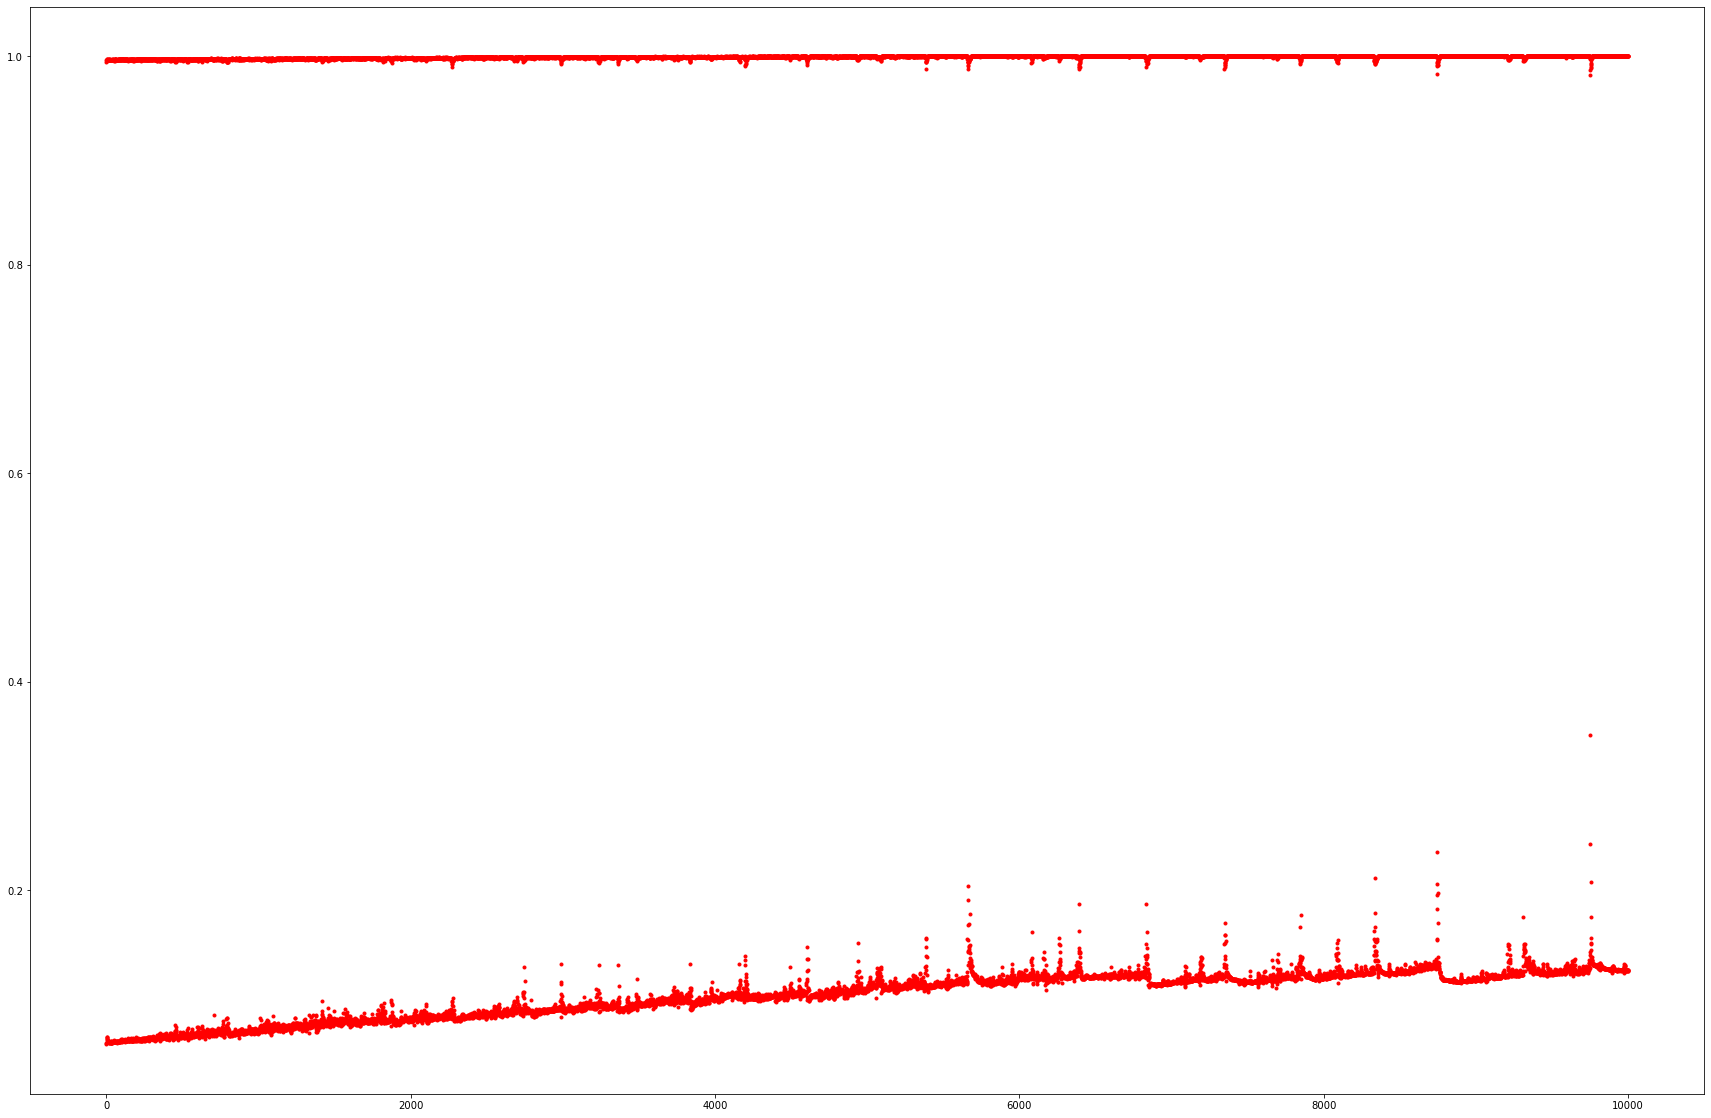

In [138]:
x_len = np.arange(len(y_acc))

plt.figure(figsize=(30,20))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='red', markersize=3)

In [143]:
#epoch 학습 반복 횟수 결정하기 (학습 시간과 정확도, 테스트 결과)
df = df_pre.sample(frac=0.2)

history = model.fit(X, Y, validation_split=0.3,
                    epochs=10, batch_size=5)
#history2 = model.fit(X, Y, validation_split=0.3, epochs=1000, batch_size=400)

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

Train on 4547 samples, validate on 1950 samples
Epoch 1/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0715 - accuracy: 0.9817 - val_loss: 0.0688 - val_accuracy: 0.9810
Epoch 2/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.1087 - accuracy: 0.9787 - val_loss: 0.3844 - val_accuracy: 0.8467
Epoch 3/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0598 - accuracy: 0.9855 - val_loss: 0.0506 - val_accuracy: 0.9887
Epoch 4/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0634 - val_accuracy: 0.9836
Epoch 5/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0775 - val_accuracy: 0.9821
Epoch 6/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0539 - accuracy: 0.9850 - val_loss: 0.0435 - val_accuracy: 0.9908
Epoch 7/10
4547/4547 [==============================] - 5s 1ms/step - loss: 0.0670 - acc

In [152]:
#학습의 자동 중단
#학습이 깊어질수록 학습 데이터에 대한 예측 성공률은 높아지지만
#테스트셋에 대해선 낮아짐
#따라서 정확도가 낮아지다 높아지는 순간 학습 중단

#자동 중단 설정(EarlyStopping()) 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번 기다릴지 정해줌
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

model.fit(X, Y, validation_split=0.2, epochs=500,
         batch_size=100, callbacks=[early_stopping_callback])

print('\nAccuracy: %.4f' % (model.evaluate(X, Y)[1]))

Train on 5197 samples, validate on 1300 samples
Epoch 1/500
5197/5197 [==============================] - 1s 182us/step - loss: 2.5939 - accuracy: 0.4437 - val_loss: 0.4129 - val_accuracy: 0.8846
Epoch 2/500
5197/5197 [==============================] - 0s 63us/step - loss: 0.3440 - accuracy: 0.8924 - val_loss: 0.2805 - val_accuracy: 0.9031
Epoch 3/500
5197/5197 [==============================] - 0s 66us/step - loss: 0.2678 - accuracy: 0.9101 - val_loss: 0.2324 - val_accuracy: 0.9192
Epoch 4/500
5197/5197 [==============================] - 0s 62us/step - loss: 0.2186 - accuracy: 0.9282 - val_loss: 0.1956 - val_accuracy: 0.9369
Epoch 5/500
5197/5197 [==============================] - 0s 62us/step - loss: 0.1951 - accuracy: 0.9390 - val_loss: 0.1861 - val_accuracy: 0.9392
Epoch 6/500
5197/5197 [==============================] - 0s 62us/step - loss: 0.1848 - accuracy: 0.9421 - val_loss: 0.1799 - val_accuracy: 0.9446
Epoch 7/500
5197/5197 [==============================] - 0s 61us/step - los

5197/5197 [==============================] - 0s 58us/step - loss: 0.0674 - accuracy: 0.9806 - val_loss: 0.0565 - val_accuracy: 0.9838
Epoch 57/500
5197/5197 [==============================] - 0s 56us/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.0618 - val_accuracy: 0.9838
Epoch 58/500
5197/5197 [==============================] - 0s 57us/step - loss: 0.0684 - accuracy: 0.9788 - val_loss: 0.0593 - val_accuracy: 0.9831
Epoch 59/500
5197/5197 [==============================] - 0s 59us/step - loss: 0.0586 - accuracy: 0.9838 - val_loss: 0.0565 - val_accuracy: 0.9846
Epoch 60/500
5197/5197 [==============================] - 0s 59us/step - loss: 0.0569 - accuracy: 0.9831 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 61/500
5197/5197 [==============================] - 0s 56us/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0561 - val_accuracy: 0.9815
Epoch 62/500
5197/5197 [==============================] - 0s 58us/step - loss: 0.0569 - accuracy: 0.9836 - val_loss: 0.0576 - val_a

Epoch 112/500
5197/5197 [==============================] - 0s 58us/step - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.0495 - val_accuracy: 0.9869
Epoch 113/500
5197/5197 [==============================] - 0s 57us/step - loss: 0.0496 - accuracy: 0.9863 - val_loss: 0.0492 - val_accuracy: 0.9877
Epoch 114/500
5197/5197 [==============================] - 0s 60us/step - loss: 0.0532 - accuracy: 0.9848 - val_loss: 0.0578 - val_accuracy: 0.9854
Epoch 115/500
5197/5197 [==============================] - 0s 59us/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 116/500
5197/5197 [==============================] - 0s 59us/step - loss: 0.0518 - accuracy: 0.9842 - val_loss: 0.0485 - val_accuracy: 0.9862
Epoch 117/500
5197/5197 [==============================] - 0s 60us/step - loss: 0.0581 - accuracy: 0.9833 - val_loss: 0.1040 - val_accuracy: 0.9700
Epoch 118/500
5197/5197 [==============================] - 0s 59us/step - loss: 0.0517 - accuracy: 0.9844 - val_

In [162]:
#선형 회귀 적용 - 보스턴 집값 예측 분석
df = pd.read_csv('./dataset/housing.csv', delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,:-1]
Y = dataset[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#input 수
n_input = len(X[0][:])
print(n_input)

model = Sequential()
model.add(Dense(30, input_dim=n_input, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam')

#early_stopping_callback = EarlyStopping(monitor='loss', patience=10)
model.fit(X_train, Y_train, epochs=400, batch_size=20)#, callbacks=[early_stopping_callback])

13
Epoch 1/400
354/354 [==============================] - 1s 2ms/step - loss: 12385.9019
Epoch 2/400
354/354 [==============================] - 0s 257us/step - loss: 2414.2965
Epoch 3/400
354/354 [==============================] - 0s 258us/step - loss: 610.6278
Epoch 4/400
354/354 [==============================] - 0s 252us/step - loss: 320.4188
Epoch 5/400
354/354 [==============================] - 0s 254us/step - loss: 242.0438
Epoch 6/400
354/354 [==============================] - 0s 268us/step - loss: 193.0822
Epoch 7/400
354/354 [==============================] - 0s 255us/step - loss: 160.8910
Epoch 8/400
354/354 [==============================] - 0s 251us/step - loss: 138.5351
Epoch 9/400
354/354 [==============================] - 0s 231us/step - loss: 121.4655
Epoch 10/400
354/354 [==============================] - 0s 237us/step - loss: 109.8630
Epoch 11/400
354/354 [==============================] - 0s 241us/step - loss: 99.8490
Epoch 12/400
354/354 [===========================

354/354 [==============================] - 0s 234us/step - loss: 36.8698
Epoch 97/400
354/354 [==============================] - 0s 223us/step - loss: 37.0681
Epoch 98/400
354/354 [==============================] - 0s 217us/step - loss: 37.1024
Epoch 99/400
354/354 [==============================] - 0s 228us/step - loss: 35.9699
Epoch 100/400
354/354 [==============================] - 0s 231us/step - loss: 35.4608
Epoch 101/400
354/354 [==============================] - 0s 225us/step - loss: 35.7464
Epoch 102/400
354/354 [==============================] - 0s 223us/step - loss: 35.2170
Epoch 103/400
354/354 [==============================] - 0s 220us/step - loss: 35.2349
Epoch 104/400
354/354 [==============================] - 0s 223us/step - loss: 35.3599
Epoch 105/400
354/354 [==============================] - 0s 225us/step - loss: 35.5982
Epoch 106/400
354/354 [==============================] - 0s 223us/step - loss: 34.6298
Epoch 107/400
354/354 [==============================] - 0s 

354/354 [==============================] - 0s 231us/step - loss: 28.5119
Epoch 191/400
354/354 [==============================] - 0s 223us/step - loss: 27.2416
Epoch 192/400
354/354 [==============================] - 0s 228us/step - loss: 26.4680
Epoch 193/400
354/354 [==============================] - 0s 220us/step - loss: 26.1496
Epoch 194/400
354/354 [==============================] - 0s 228us/step - loss: 26.2878
Epoch 195/400
354/354 [==============================] - 0s 225us/step - loss: 26.0299
Epoch 196/400
354/354 [==============================] - 0s 223us/step - loss: 26.6395
Epoch 197/400
354/354 [==============================] - 0s 228us/step - loss: 27.3098
Epoch 198/400
354/354 [==============================] - 0s 228us/step - loss: 26.8694
Epoch 199/400
354/354 [==============================] - 0s 223us/step - loss: 25.8046
Epoch 200/400
354/354 [==============================] - 0s 231us/step - loss: 25.4321
Epoch 201/400
354/354 [==============================] - 

354/354 [==============================] - 0s 231us/step - loss: 21.2222
Epoch 284/400
354/354 [==============================] - 0s 231us/step - loss: 22.9344
Epoch 285/400
354/354 [==============================] - 0s 220us/step - loss: 21.2085
Epoch 286/400
354/354 [==============================] - 0s 231us/step - loss: 20.3531
Epoch 287/400
354/354 [==============================] - 0s 222us/step - loss: 22.6931
Epoch 288/400
354/354 [==============================] - 0s 223us/step - loss: 21.8801
Epoch 289/400
354/354 [==============================] - 0s 223us/step - loss: 20.2488
Epoch 290/400
354/354 [==============================] - 0s 228us/step - loss: 21.2569
Epoch 291/400
354/354 [==============================] - 0s 225us/step - loss: 21.0404
Epoch 292/400
354/354 [==============================] - 0s 225us/step - loss: 20.2940
Epoch 293/400
354/354 [==============================] - ETA: 0s - loss: 22.10 - 0s 225us/step - loss: 20.4526
Epoch 294/400
354/354 [==========

354/354 [==============================] - 0s 231us/step - loss: 16.1302
Epoch 377/400
354/354 [==============================] - 0s 225us/step - loss: 16.5791
Epoch 378/400
354/354 [==============================] - 0s 228us/step - loss: 18.3973
Epoch 379/400
354/354 [==============================] - 0s 231us/step - loss: 16.3685
Epoch 380/400
354/354 [==============================] - 0s 225us/step - loss: 18.5973
Epoch 381/400
354/354 [==============================] - 0s 225us/step - loss: 17.5450
Epoch 382/400
354/354 [==============================] - 0s 225us/step - loss: 16.1582
Epoch 383/400
354/354 [==============================] - 0s 226us/step - loss: 16.0809
Epoch 384/400
354/354 [==============================] - 0s 225us/step - loss: 16.0594
Epoch 385/400
354/354 [==============================] - 0s 228us/step - loss: 16.3460
Epoch 386/400
354/354 [==============================] - 0s 231us/step - loss: 15.4289
Epoch 387/400
354/354 [==============================] - 

In [163]:
#flatten() 데이터 배열을 1차원으로 바꿔주는 함수
Y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    pred = Y_pred[i]
    print('실제가격: {:.3f}, 예상가격: {:.3f}'.format(label, pred))

실제가격: 22.600, 예상가격: 26.254
실제가격: 50.000, 예상가격: 24.719
실제가격: 23.000, 예상가격: 26.004
실제가격: 8.300, 예상가격: 7.908
실제가격: 21.200, 예상가격: 19.561
실제가격: 19.900, 예상가격: 21.615
실제가격: 20.600, 예상가격: 22.244
실제가격: 18.700, 예상가격: 21.352
실제가격: 16.100, 예상가격: 16.642
실제가격: 18.600, 예상가격: 14.896


In [164]:
#MNIST 손글씨 인식하기: 데이터 전처리

from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 4s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


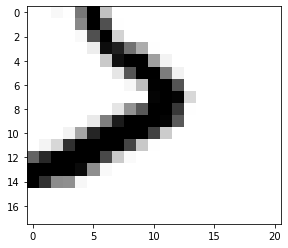

In [182]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os

plt.imshow(X_train[0][10:,7:], cmap='Greys')
plt.show()

In [195]:
#첫번째 손글씨의 28 x 28 (784개의) 픽셀 값들
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

#28 x 28 이차원배열을 784개의 일차원 배열로 변환 reshape(총 샘플 수, 일차원 속성의 수)
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784)
X_test = X_test.astype('float64') / 255

X_train[0]

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [199]:
#Y 클래스 값 확인
print('class: %d' % (Y_train[0]))

#Y 클래스 값 one-hot encoder 변환
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

TypeError: %d format: a number is required, not numpy.ndarray

In [200]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 5s 96us/step - loss: 0.3345 - accuracy: 0.9075 - val_loss: 0.1702 - val_accuracy: 0.9510

Epoch 00001: val_loss improved from inf to 0.17018, saving model to ./model/mnist_01-0.1702.hdf5
Epoch 2/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.1398 - accuracy: 0.9601 - val_loss: 0.1201 - val_accuracy: 0.9653

Epoch 00002: val_loss improved from 0.17018 to 0.12013, saving model to ./model/mnist_02-0.1201.hdf5
Epoch 3/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.0935 - accuracy: 0.9740 - val_loss: 0.1019 - val_accuracy: 0.9707

Epoch 00003: val_loss improved from 0.12013 to 0.10188, saving model to ./model/mnist_03-0.1019.hdf5
Epoch 4/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.0666 - accuracy: 0.9808 - val_loss: 0.0913 - val_accuracy: 0.9716

Epoch 00004: val_loss improved from 0.10188 to 0.09130,

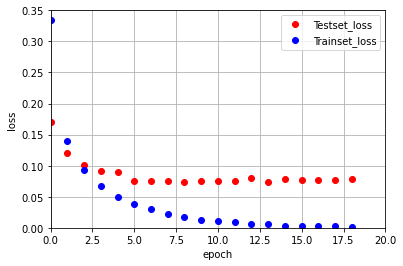

In [205]:
#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
#출력층
model.add(Dense(10, activation = 'softmax'))
#오차함수(loss): categorical_crossentropy - iris 데이터처럼 결과 분류가 여러개일 때
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#최적화 함수

#다중 분류 평가 측정 지표 accuracy

#모델 실행 결과 model 폴더에 파일로 저장
modelpath = './model/mnist_{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss', verbose=1,
                               save_best_only=True) #앞 모델보다 나아졌을 때만 저장

#학습 중단 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

model = model.fit(X_train, Y_train, validation_split=0.2, epochs=200,
                  batch_size=200, callbacks=[early_stopping_callback, checkpointer])

#학습 정확도와 테스트셋 오차를 시각화
y_vloss = model.history['val_loss']
y_loss = model.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, 'o', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.axis([0,20,0,0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

CNN을 이용한 자동차 사고 사진 분류
https://jaehyeongan.github.io/2018/07/01/CNN-%EB%AA%A8%EB%8D%B8%EC%9D%84-%ED%86%B5%ED%95%9C-%EC%9E%90%EB%8F%99%EC%B0%A8-%EC%82%AC%EA%B3%A0-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B6%84%EB%A5%98/

위에서 쓰인 크롤러로 숫자, 글자 수집 후 겹쳐서 훈련 데이터로 사용?